# Task 1: Data Exploration and Missing Value Imputation

The dataset used in this coursework is sourced from the [World Bank Development Indicators](https://data.worldbank.org/), covering 10 socio-economic indicators for 221 countries from 1980 to 2023. The key indicators include GDP per capita, literacy rate, life expectancy, unemployment, and export statistics. These indicators form a multivariate time-series structure for each country.

#### Data Inspection and Cleaning:
- We first filtered valid countries by removing aggregate regions and economic zones using a regular expression on country metadata.
- Time-series data was downloaded using the `wbdata` Python package for consistent reproducibility and standardization.
- Initial exploration revealed that several indicators contained **missing values**, which varied by country and year.

In [ ]:
# Install wbdata library
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Extract dataset from world bank data
import wbdata
import pandas as pd
import datetime

# Function to download data from World Bank API
def download_world_bank_data(indicators, country_codes, start_year, end_year, output_file):
    """
    Downloads tabular and time-series data from the World Bank API.

    Parameters:
        indicators (dict): A dictionary of indicators {"indicator_code": "indicator_name"}.
        country_codes (list): List of country codes to include in the data.
        start_year (int): Start year for the data.
        end_year (int): End year for the data.
        output_file (str): Path to save the downloaded data as a CSV file.

    Returns:
        None
    """
    # Set the date range
    data_date_range = (datetime.datetime(start_year, 1, 1), datetime.datetime(end_year, 12, 31))

    # Fetch data
    print("Fetching data from the World Bank API...")
    data = wbdata.get_dataframe(indicators, country=country_codes, date=data_date_range, parse_dates=True)

    # Reset index and save to CSV
    data.reset_index(inplace=True)
    data.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")

# Define indicators of interest (you can look up indicators in the metadat file)
# Each idicator has an ID, and you can assign to it a label that will be used as column name in the dataFrame

indicators = {
    "NY.GDP.PCAP.PP.KD": "GDPpc_2017$", #"GDP per capita, PPP (constant 2017 US$)
    "SP.POP.TOTL": "Population_total",
    "SP.DYN.LE00.IN": "Life_expectancy"
    ,"SE.ADT.LITR.ZS": "Literacy_rate"
    ,"SL.UEM.TOTL.ZS": "Unemployment_rate"
    ,"EG.USE.PCAP.KG.OE": "Access_electricity"
    ,"SP.DYN.TFRT.IN": "Fertility_rate"
    ,"SI.POV.NAHC": "Poverty_ratio"
    ,"SE.PRM.ENRR": "Primary_school_enrolment_rate"
    #,"NE.GDI.TOTL.ZS": "Gross_capital_formation"
    #,"IT.NET.USER.ZS": "Internet_users"
    #,"SE.XPD.TOTL.GD.ZS": "Gov_education_investment"
    #,"EN.ATM.CO2E.PC": "CO2_emissions"
    #,"SI.POV.GINI": "Income_inequality"
    #,"SH.H2O.BASW.ZS": "Access_to_water"
    ,"EG.USE.PCAP.KG.OE": "Energy_use"
    #,"NE.EXP.GNFS.CD": "Exports_c$", #Exports of goods and services (current US$)
    ,"NE.EXP.GNFS.KD": "Exports_2017$" #Exports of goods and services (current US$)
    # ,"SE.XPD.PRIM.PC.ZS":  "Expenditure_primary" #Government expenditure per student, primary (% of GDP per capita)
    # ,"SE.XPD.SECO.PC.ZS":  "Expenditure_secodary" #Government expenditure per student, secondary (% of GDP per capita)
    # ,"SE.XPD.TERT.PC.ZS":  "Expenditure_tertiary" #"Government expenditure per student, tertiary (% of GDP per capita)"
    }


expression='^(?!(?:World|Upper middle income|Sub\-Saharan Africa excluding South Africa|Sub\-Saharan Africa|Latin America \& Caribbean|IDA countries in Sub\-Saharan Africa classified as fragile situations|IDA\scountries\sin\sSub\-Saharan\sAfrica\snot\sclassified\sas\sfragile\ssituations|Sub\-Saharan Africa excluding South Africa and Nigeria|South Asia \(IDA \& IBRD\)|Sub-Saharan Africa \(IDA \& IBRD countries\)|Middle East \& North Africa \(IDA \& IBRD countries\)|Latin America \& the Caribbean \(IDA \& IBRD countries\)|Europe \& Central Asia \(IDA \& IBRD countries\)|East Asia \& Pacific \(IDA \& IBRD countries\)|Sub\-Saharan Africa|Sub\-Saharan Africa \(excluding high income\)|Resource rich Sub\-Saharan Africa countries|IDA countries not classified as fragile situations\, excluding Sub-Saharan Africa|Non\-resource rich Sub\-Saharan Africa countries|Middle East \& North Africa \(excluding high income\)|Middle East \(developing only\)|Latin America \& Caribbean \(excluding high income\)|IBRD\, including blend|Heavily indebted poor countries \(HIPC\)|IDA countries classified as fragile situations\, excluding Sub\-Saharan Africa|Europe \& Central Asia \(excluding high income\)|East Asia \& Pacific \(excluding high income\)|Sub\-Saharan Africa \(IDA\-eligible countries\)|IDA countries in Sub\-Saharan Africa classified as fragile situations|South Asia \(IDA\-eligible countries\)|IDA countries in Sub\-Saharan Africa not classified as fragile situations|Middle East \& North Africa \(IDA\-eligible countries\)|Latin America \& the Caribbean \(IDA\-eligible countries\)|Europe \& Central Asia \(IDA\-eligible countries\)|East Asia \& Pacific \(IDA\-eligible countries\)|South Asia \(IFC classification\)|Middle East and North Africa \(IFC classification\)|Latin America and the Caribbean \(IFC classification\)|Europe and Central Asia \(IFC classification\)|East Asia and the Pacific \(IFC classification\)|Sub\-Saharan Africa \(IFC classification\)|Sub\-Saharan Africa \(IBRD\-only countries\)|Latin America \& the Caribbean \(IBRD\-only countries\)|Middle East \& North Africa \(IBRD\-only countries\)|East Asia \& Pacific \(IBRD\-only countries\)|IBRD countries classified as high income|Europe \& Central Asia \(IBRD\-only countries\)|Sub\-Saharan Africa \(IDA \& IBRD countries\)|Sub-Saharan Africa \(excluding high income\)|Sub\-Saharan Africa|South Asia \(IDA \& IBRD\)|South Asia|Small states|Pre\-demographic dividend|Post\-demographic dividend|Pacific island small states|Other small states|OECD members|Not classified|North America|Middle income|Middle East \& North Africa \(IDA \& IBRD countries\)|Middle East \& North Africa \(excluding high income\)|Middle East \& North Africa|Lower middle income|Low income|Low \& middle income|Least developed countries\: UN classification|Latin America \& the Caribbean \(IDA \& IBRD countries\)|Latin America \& Caribbean \(excluding high income\)|Latin America \& Caribbean|Late\-demographic dividend|IDA total|IDA only|IDA blend|IDA \& IBRD total|IBRD only|High income|Heavily indebted poor countries \(HIPC\)|Fragile and conflict affected situations|European Union|Europe \& Central Asia \(IDA \& IBRD countries\)|Europe \& Central Asia \(excluding high income\)|Europe \& Central Asia|Euro area|East Asia \& Pacific \(IDA \& IBRD countries\)|East Asia \& Pacific \(excluding high income\)|East Asia \& Pacific|Early\-demographic dividend|Central Europe and the Baltics|Caribbean small states|Arab World|Africa Western and Central|Africa Eastern and Southern)$).*$'
data = wbdata.get_countries(query=expression)
country_codes=[]
for item in data:
    if item["id"]!='DNS' and item["id"]!='DSF':
        country_codes.append(item["id"])

#country_codes = ["USA", "CHN", "IND", "BRA", "RUS"]  # Example countries
start_year = 1980
end_year = 2023
output_file = "data/world_bank_data_dev.csv"

# Download and save data
download_world_bank_data(indicators, country_codes, start_year, end_year, output_file)


Key '-35359017028402046' not in persistent cache.
Key '-6715429016325902424' not in persistent cache.
Key '-6007362889295304122' not in persistent cache.
Key '-3196359501778018155' not in persistent cache.
Key '-517081193177905007' not in persistent cache.
Key '5302832862360528660' not in persistent cache.
Key '8113836249877814627' not in persistent cache.
Key '1775873088273556104' not in persistent cache.
Key '4586876475790842071' not in persistent cache.
Key '1539074713597611103' not in persistent cache.
Key '8575820783702530497' not in persistent cache.
Key '8367739404168204603' not in persistent cache.
Key '4677448148214434777' not in persistent cache.
Key '-6559935154993462744' not in persistent cache.
Key '7520057938681345195' not in persistent cache.
Key '8941614611235410734' not in persistent cache.
Key '-2295768691972486787' not in persistent cache.
Key '-5986059947926256613' not in persistent cache.
Key '1223300822575397482' not in persistent cache.
Key '-8870530228252690311'

Fetching data from the World Bank API...


Data saved to data/world_bank_data_dev.csv


In [5]:
#Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn joblib tqdm pmdarima

In [142]:
# Import Libraries
# Suppress Warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standard Libraries
import os
import time
import random
import csv
import json
import ast
from itertools import product

# Data Handling
import numpy as np
import pandas as pd

# Preprocessing & Modeling
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score,
    mean_absolute_error, mean_squared_error,
    silhouette_score, davies_bouldin_score, calinski_harabasz_score
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Deep Learning (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

# Model Saving / Loading
import joblib

# Progress Bar
from tqdm import tqdm

# Time Series Modeling
from pmdarima import auto_arima

# set seed for producibility
seed=11
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(seed)

timestamp = int(time.time())

In [113]:
# Read Raw world bank data
data_path = r"data/world_bank_data_dev.csv"
df = pd.read_csv(data_path)
print("Dataset Information:")
df.info()
print("Dataset Shape:", df.shape)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        9636 non-null   object 
 1   date                           9636 non-null   object 
 2   GDPpc_2017$                    6655 non-null   float64
 3   Population_total               8587 non-null   float64
 4   Life_expectancy                9086 non-null   float64
 5   Literacy_rate                  1124 non-null   float64
 6   Unemployment_rate              5452 non-null   float64
 7   Energy_use                     4854 non-null   float64
 8   Fertility_rate                 9085 non-null   float64
 9   Poverty_ratio                  1024 non-null   float64
 10  Primary_school_enrolment_rate  6296 non-null   float64
 11  Exports_2017$                  5901 non-null   float64
dtypes: float64(10), object(2)
m

In [114]:
# Data Exploration
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 Rows:
  country        date   GDPpc_2017$  Population_total  Life_expectancy  \
0   Aruba  2023-01-01  40516.808563               NaN              NaN   
1   Aruba  2022-01-01  38877.674436               NaN           74.992   
2   Aruba  2021-01-01  35696.309372               NaN           74.626   
3   Aruba  2020-01-01  28521.688852               NaN           75.723   
4   Aruba  2019-01-01  38435.426913          106000.0           76.248   

   Literacy_rate  Unemployment_rate  Energy_use  Fertility_rate  \
0            NaN                NaN         NaN             NaN   
1            NaN                NaN         NaN           1.179   
2            NaN                NaN         NaN           1.180   
3      97.989998                NaN         NaN           1.325   
4            NaN                NaN         NaN           1.486   

   Poverty_ratio  Primary_school_enrolment_rate  Exports_2017$  
0            NaN                            NaN            NaN  
1      

In [115]:
# Change date format and observe missing values
df["date"] = pd.to_datetime(df["date"]).dt.year
print("Missing Values:")
df.isnull().sum().sort_values(ascending=False)

Missing Values:


Poverty_ratio                    8612
Literacy_rate                    8512
Energy_use                       4782
Unemployment_rate                4184
Exports_2017$                    3735
Primary_school_enrolment_rate    3340
GDPpc_2017$                      2981
Population_total                 1049
Fertility_rate                    551
Life_expectancy                   550
country                             0
date                                0
dtype: int64

C:\Users\tanbe\AppData\Local\Temp\ipykernel_32740\3904211530.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())


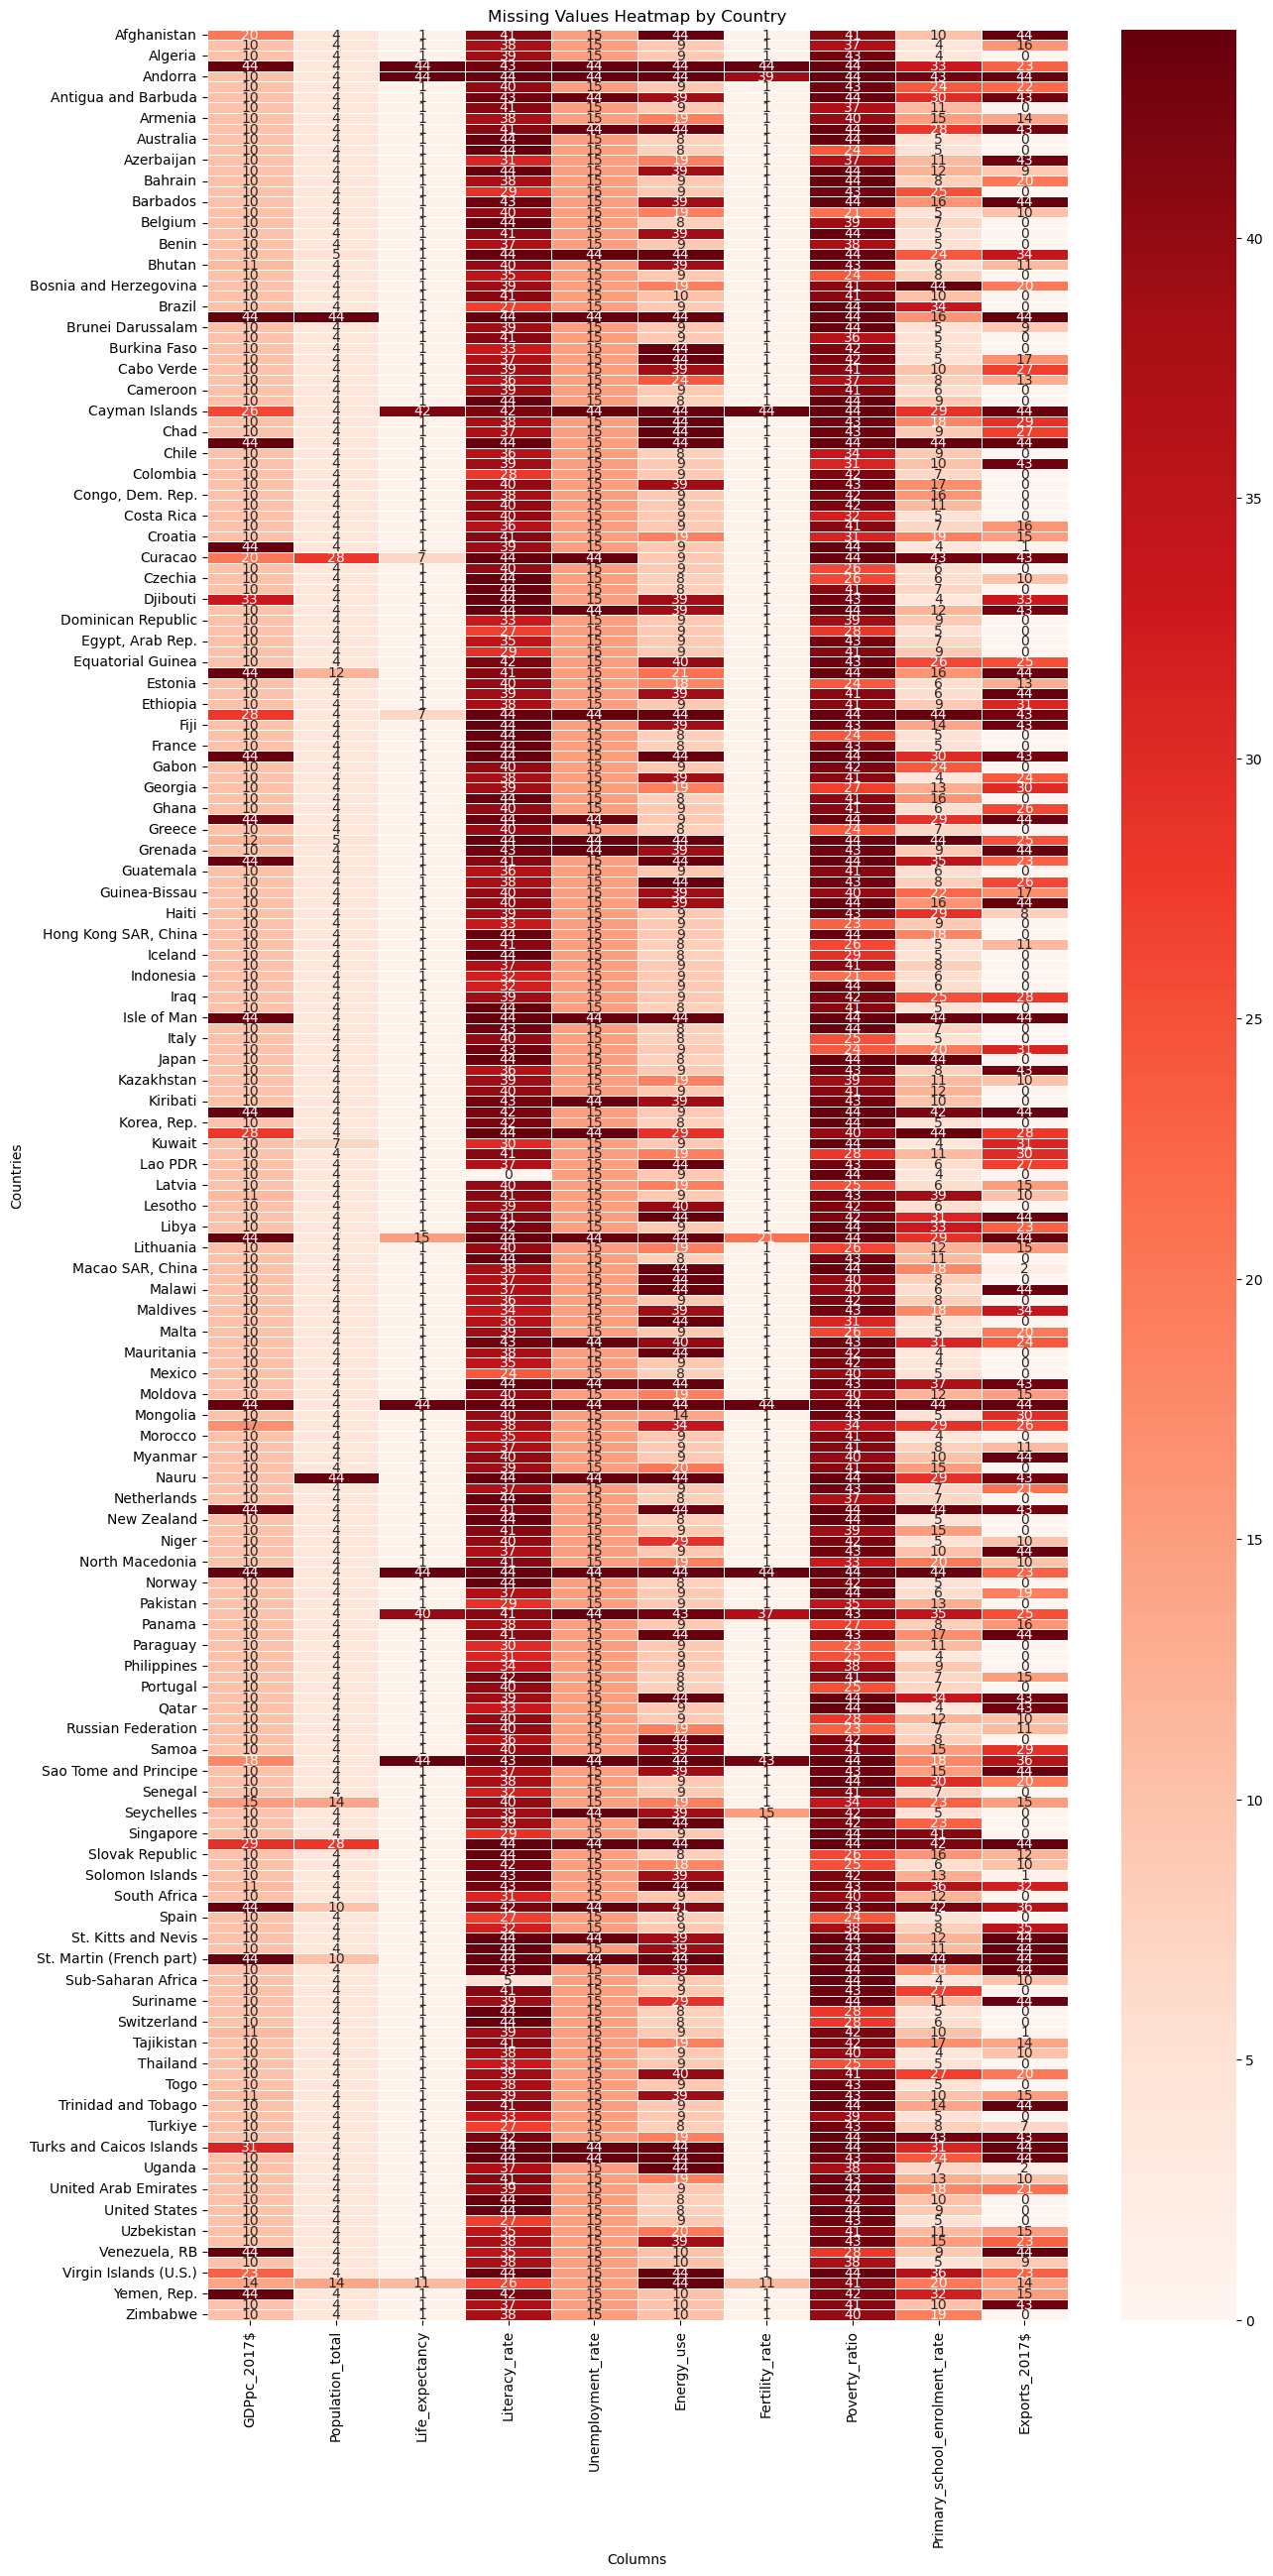

In [ ]:
# Plot missing values of indicators across countries
# Assuming the provided data is loaded as a DataFrame named df_missing_values
missing_by_country = df.drop(columns=['date']).groupby('country').apply(lambda x: x.isnull().sum())
missing_by_country = missing_by_country.drop(columns=['country'])

# Convert all columns except 'country' to numeric, ensuring proper visualization
df_missing_values = missing_by_country.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(14, 30))  # Adjust figure size for better visibility
sns.heatmap(df_missing_values, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

# Adjust labels and title
plt.xlabel("Columns")
plt.ylabel("Countries")
plt.title("Missing Values Heatmap by Country")

# Show the plot
plt.show()

### Missing Data Imputation

To ensure data quality and maintain model performance, we applied a **hybrid imputation strategy** combining:

1. **Sequence-aware heuristics and Auto ARIMA-based forecasting** to fill small contiguous blocks of missing values in time-series data for each country and indicator.
2. **K-Nearest Neighbors (KNN) Imputation** for residual missing values across the entire dataset using multivariate similarity.

#### Justification:
- Time-series interpolation with Auto ARIMA captures temporal dependencies, offering a more sophisticated alternative to simple forward or mean fills for short-term gaps (Hyndman and Athanasopoulos, 2018).
- KNN Imputer estimates missing values based on the feature similarity between samples, making it suitable for multivariate datasets. It is particularly useful when the missingness is random and the data exhibits underlying patterns ([scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)).

This two-step approach ensures both **temporal continuity** and **feature-space coherence** in the imputed dataset.

#### References:
- Hyndman, R. J. and Athanasopoulos, G. (2018). *Forecasting: Principles and Practice* (2nd ed.). OTexts. [https://otexts.com/fpp2/](https://otexts.com/fpp2/)
- scikit-learn `KNNImputer` — scikit-learn 1.3.2 documentation. Retrieved from [https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)


In [ ]:
# Data Imputation to solve missing values
def impute_knn(df):
    """Impute missing values using KNN with data from all countries."""
    imputer = KNNImputer(n_neighbors=3)
    numeric_df = df.select_dtypes(include=[np.number])
    imputed_data = imputer.fit_transform(numeric_df)
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=numeric_df.index)
    for col in df.columns:
        if col not in imputed_df.columns:
            imputed_df[col] = df[col]
    return imputed_df

def identify_missing_sequences(matrix):
    """ Identify missing sequences in each column of a matrix """
    is_nan = np.isnan(matrix)  # Boolean mask for missing values
    missing_indices = np.zeros_like(matrix, dtype=int)  # Store missing sequence indices
    # Compute missing groups (vectorized)
    for col in range(matrix.shape[1]):
        series=matrix[:, col]
        series = np.asarray(series)  # Convert to NumPy array
        is_nan = np.isnan(series)  # Identify missing values (NaN)
        
        # Fix: Ensure the first NaN is also counted
        missing_groups = np.cumsum(is_nan & np.concatenate(([True], ~is_nan[:-1])))  # Fix for first NaN
        missing_indices[:, col] = is_nan * missing_groups  # Assign sequence numbers

    return missing_indices

def auto_arima_impute(series, inverse=False):
    """ Auto ARIMA-based imputation for missing sequences """
    if not inverse:
        series = pd.Series(series).sort_values(ascending=True)
        valid_data = series.dropna()

        # Fit ARIMA on valid values
        model = auto_arima(valid_data, seasonal=False, suppress_warnings=True)

        # Predict missing values
        missing_idx = np.where(series.isna())[0]

        # print(series)
        # print(np.where(series.isna()))
        # print(missing_idx)
        predictions = model.predict(n_periods=len(missing_idx))
        predictions = np.flip(predictions)

    if inverse:
        series = pd.Series(series)
        valid_data = series.dropna()

        # Fit ARIMA on valid values
        valid_data = np.log1p(valid_data)
        model = auto_arima(valid_data, seasonal=False, suppress_warnings=True)

        # Predict missing values
        missing_idx = np.where(series.isna())[0]

        # print(series)
        # print(np.where(series.isna()))
        # print(missing_idx)
        predictions = model.predict(n_periods=len(missing_idx))
        predictions = np.expm1(model.predict(n_periods=len(missing_idx)))

    return np.array(predictions)

def impute_missing_values(matrix):
    """ Main function for matrix-based imputation """
    matrix = np.array(matrix, dtype=float)  # Convert to NumPy array
    missing_indices = identify_missing_sequences(matrix)
    
    for col in range(matrix.shape[1]):
        col_data = matrix[:, col]
        missing_seq = np.unique(missing_indices[:, col])
        for seq in missing_seq:
            is_nan=np.isnan(col_data)
            if seq == 0:
                continue  # Skip if not missing
            
            indices = np.where(missing_indices[:, col] == seq)[0]
            start, end, length = indices[0], indices[-1], len(indices)
            if length == 1:
                if start == 0:
                    col_data[start] = col_data[start+1]
                elif end == 43:
                    col_data[end] = col_data[end-1]
                else:
                    col_data[start] = (col_data[start+1]+col_data[start-1])/2
            elif length == 2 and (start-1) >=0 and (end+1) <44:
                col_data[start] = col_data[start-1]
                col_data[end] = col_data[end+1]
            elif length<15 and start == 0 and np.sum(is_nan[end+1:end+21])==0:
                arima_pred = auto_arima_impute(col_data[start:end+21].flatten())
                col_data[start:end+1] = arima_pred
            elif length<15 and end == 43 and np.sum(is_nan[start-15:start])==0:
                arima_pred = auto_arima_impute(col_data[start-15:end+1].flatten(), inverse=True)
                col_data[start:end+1] = arima_pred
            elif length != 44:
                try:
                    if (end+1) <=43:
                            col_data[start:end+1] = col_data[end + 1]
                    elif (start-1) >=0:
                        col_data[start:end+1] = col_data[start - 1]
                except Exception:
                    try:
                        col_data[start:end+1] = np.mean(col_data[~np.isnan(col_data)]) 
                    except Exception:
                        continue
            
        matrix[:, col] = col_data

    return matrix

processed_df_list = []
for country in tqdm(df['country'].unique(), desc="Processing Countries", unit="country"):
    # print(f"Processing {country}...")
    country_df = df[df['country'] == country].copy()
    country_labels = country_df[["country"]]
    numerical_columns = country_df.drop(columns=["country","date"])

    imputed_matrix = impute_missing_values(numerical_columns)
    imputed_df = pd.DataFrame(imputed_matrix, columns=numerical_columns.columns)
    imputed_df = pd.concat([country_labels.reset_index(drop=True), imputed_df], axis=1)

    processed_df_list.append(imputed_df)

output_imputed_df = pd.concat(processed_df_list, ignore_index=True)

# Retrieve original date values for each row using country as key
date_mapping = np.array(df['date'])

# Convert date to integer (if it's not already)
output_imputed_df['date'] = date_mapping

# Rearrange columns: Move 'date' to the second position
cols = output_imputed_df.columns.tolist()
cols.remove('date')  # Remove 'date' from its current position
cols.insert(1, 'date')  # Insert 'date' as the second column
output_imputed_df = output_imputed_df[cols]  # Reorder dataframe

final_imputed_df = impute_knn(output_imputed_df)
final_imputed_df = final_imputed_df.reindex(columns=['country'] + [col for col in final_imputed_df.columns if col != 'country'])
final_imputed_df["Unemployment_rate"] = pd.to_numeric(final_imputed_df["Unemployment_rate"], errors='coerce')
final_imputed_df["Unemployment_rate"] = final_imputed_df["Unemployment_rate"].clip(lower=0)
final_imputed_df.to_csv(r"data/final_impute_world_bank_data_dev.csv",index=False)


Processing Countries:   0%|          | 0/219 [00:00<?, ?country/s]c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
Processing Countries:   0%|          | 1/219 [00:01<06:04,  1.67s/country]c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\tanbe\anaconda3\envs\wbd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported inde

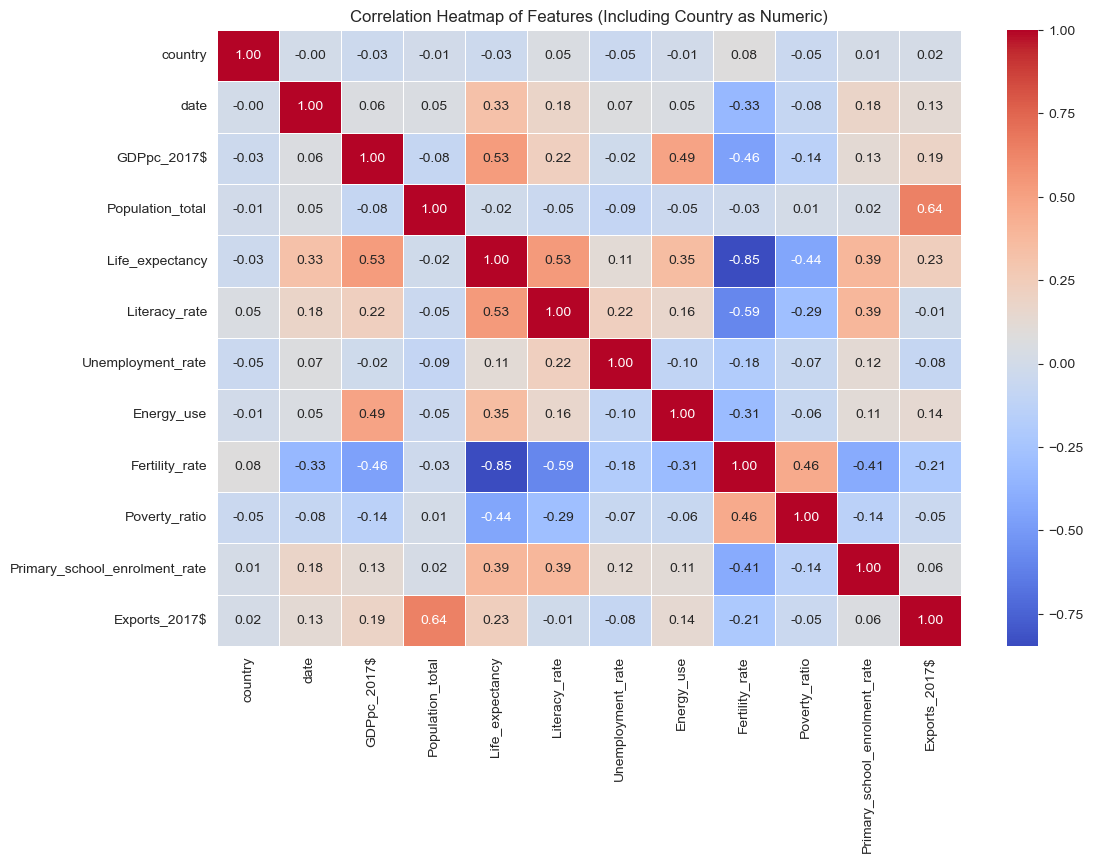

In [116]:
# Data Exploration of imputed data- Correlation Plot
final_imputed_df=pd.read_csv(r"data\final_impute_world_bank_data_dev.csv")

non_nan_df=final_imputed_df.copy()
non_nan_df.dropna()
df_corr = non_nan_df.copy()

# Convert 'country' into numerical classes
label_encoder = LabelEncoder()
df_corr['country'] = label_encoder.fit_transform(df_corr['country'])

# Compute correlation matrix
non_nan_df_corr = df_corr.corr()

# Plot the correlation heatmap with numbers
plt.figure(figsize=(12, 8))
sns.heatmap(non_nan_df_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features (Including Country as Numeric)')
plt.show()

### Data Normalization

Following imputation, all indicator values were normalized to bring the features onto a consistent scale and accelerate model convergence.

#### Method:
We applied **StandardScaler normalization** (zero mean, unit variance) using the `StandardScaler` from the `scikit-learn` library:
- This approach avoids dominance of features with large numerical ranges (e.g., population vs. literacy rate).
- Normalization was performed across all countries and years to preserve global trends and variance.

This step ensures that the input distributions are comparable across features, which improves model training stability and performance.

Reference:
- scikit-learn. (n.d.). [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) — scikit-learn 1.3.2 documentation.


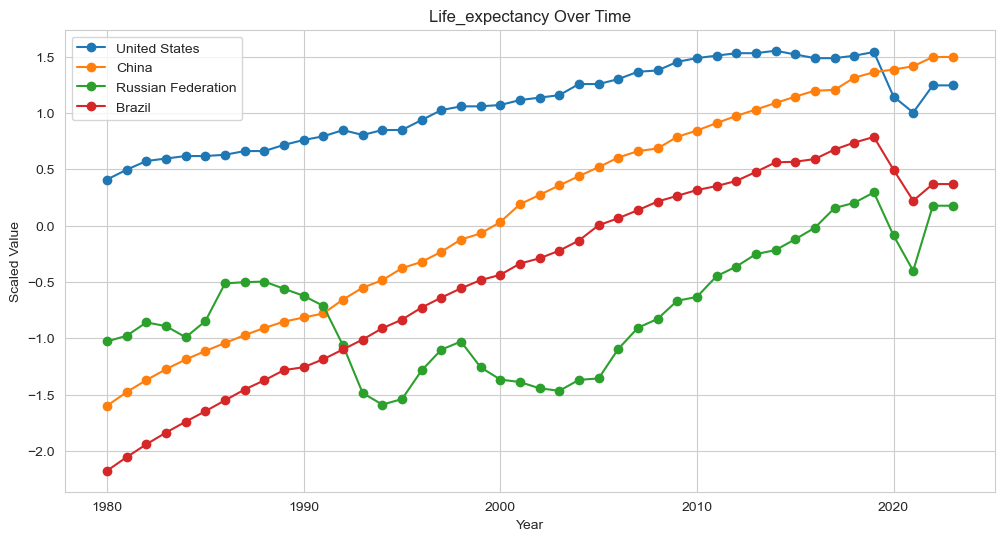

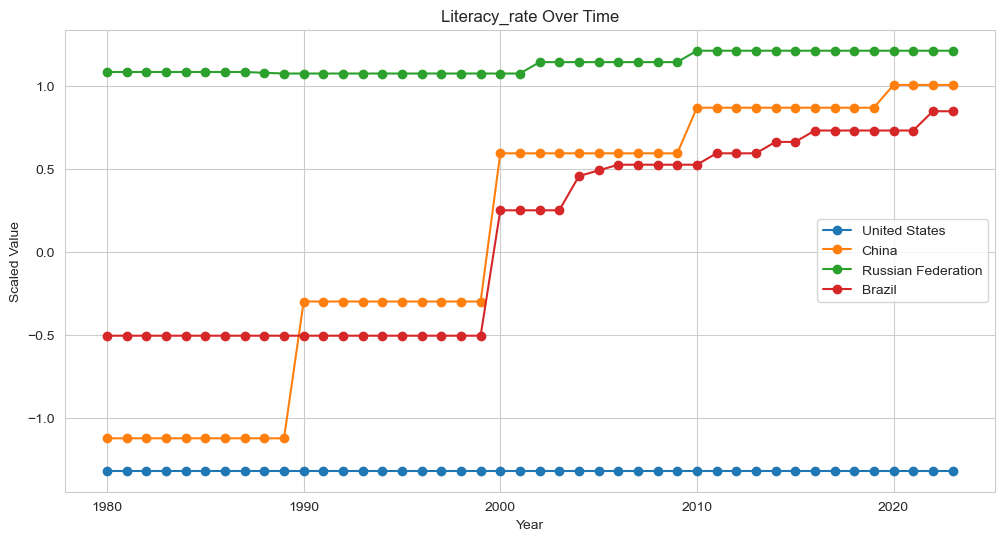

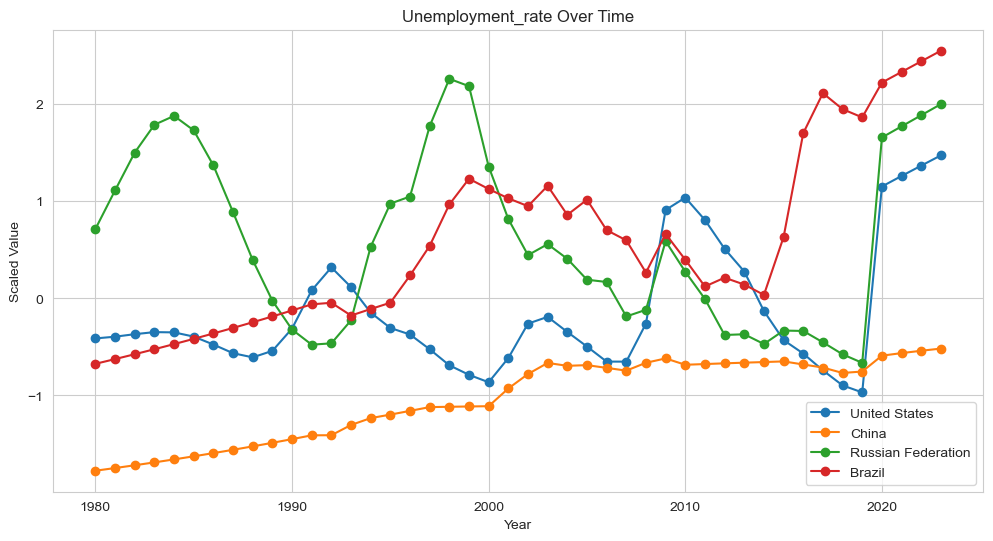

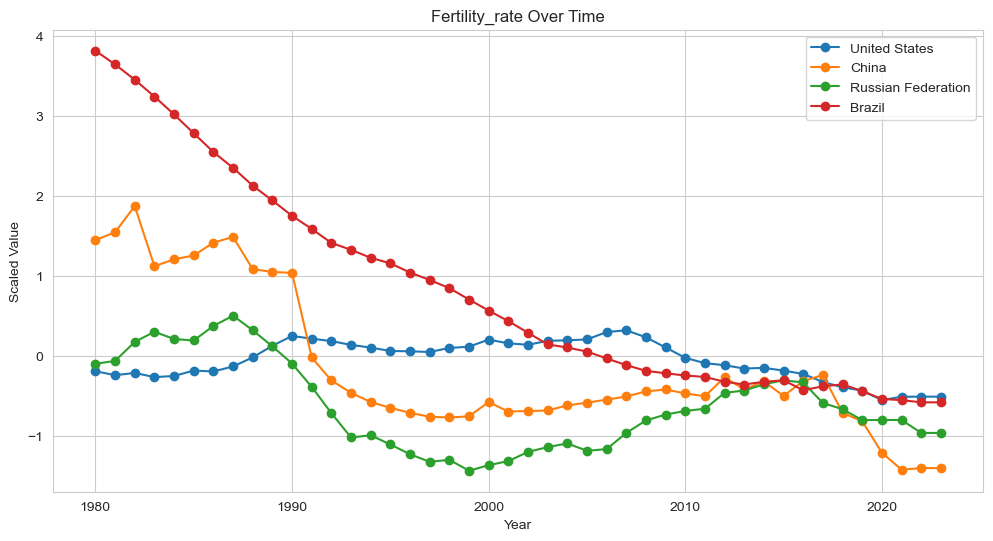

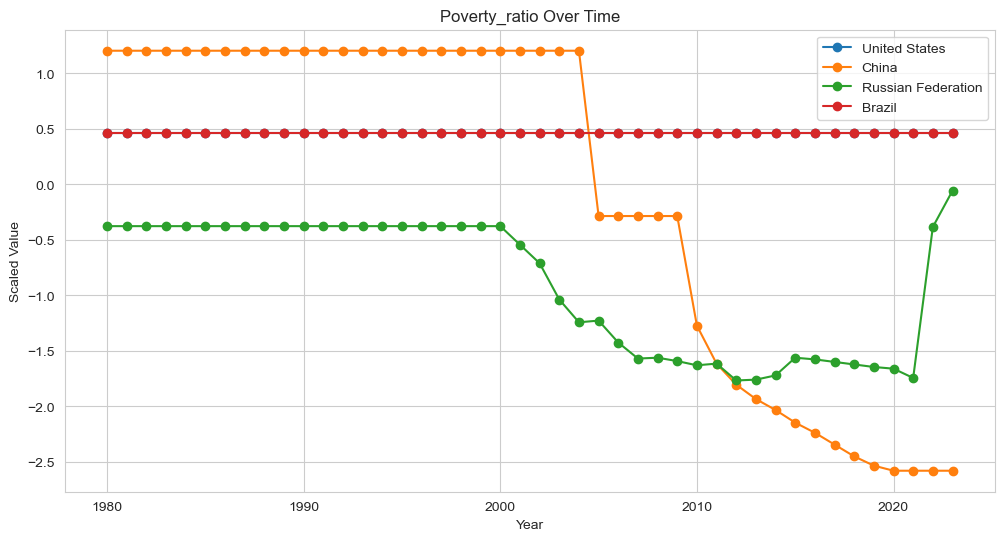

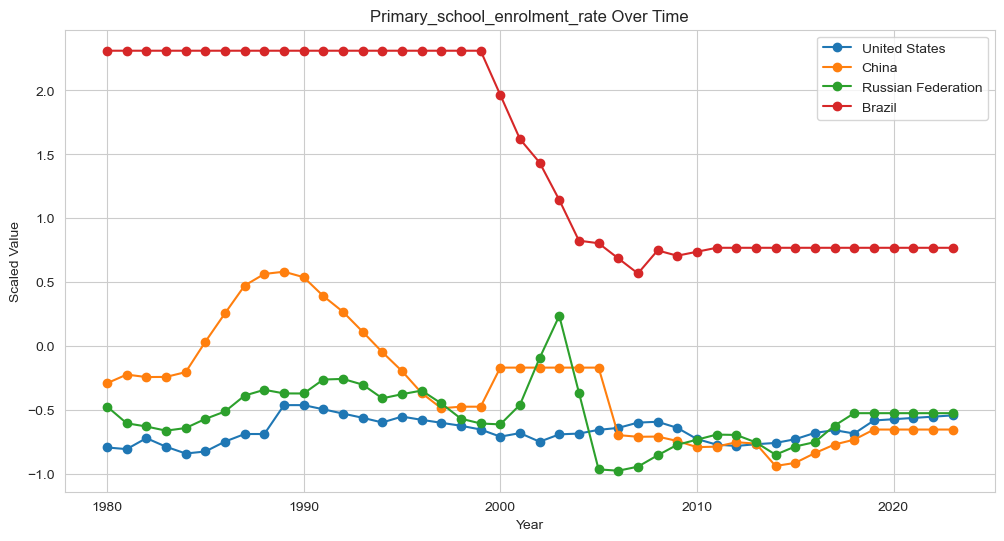

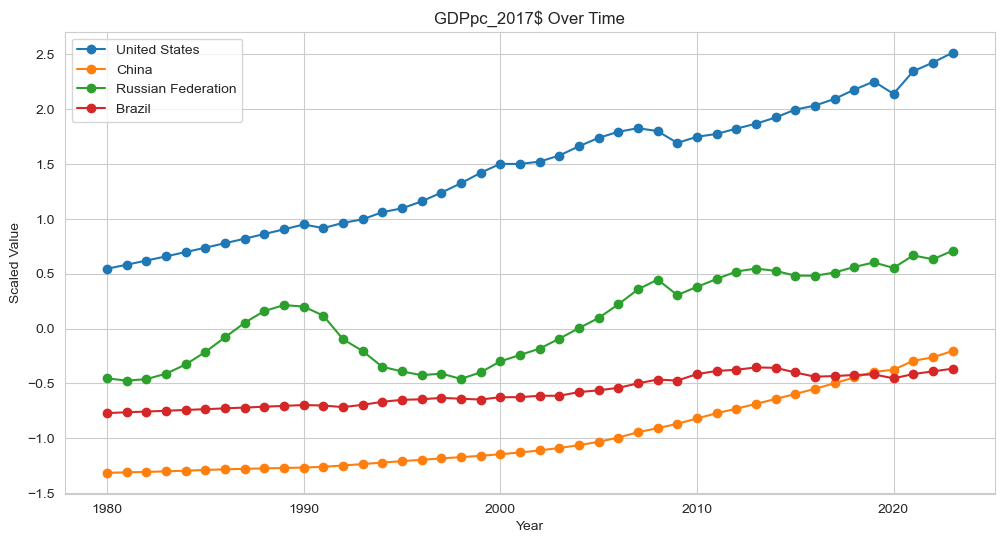

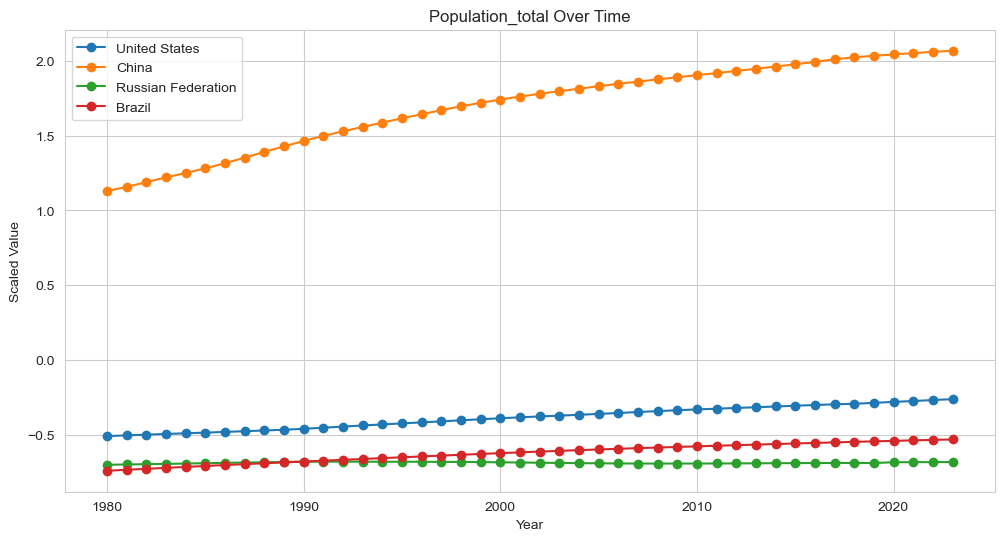

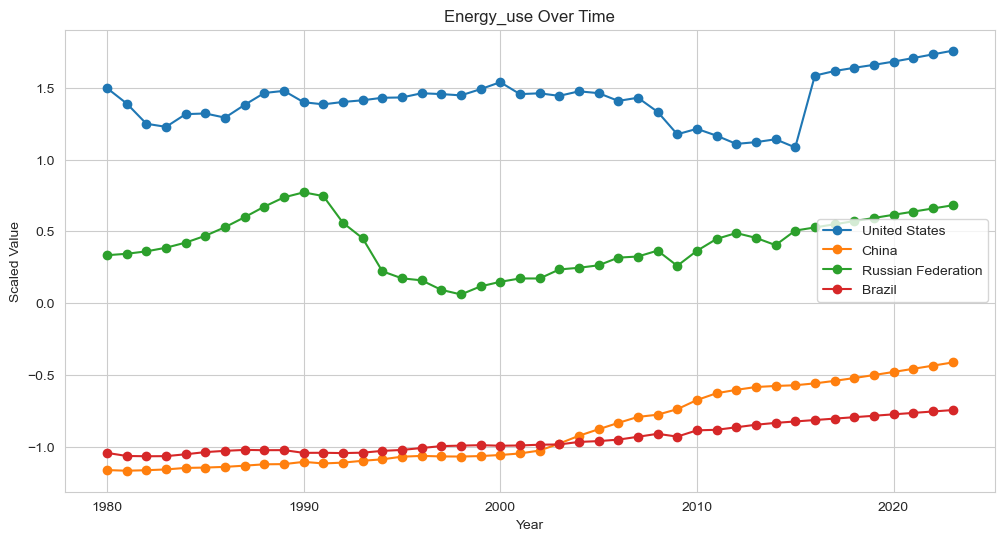

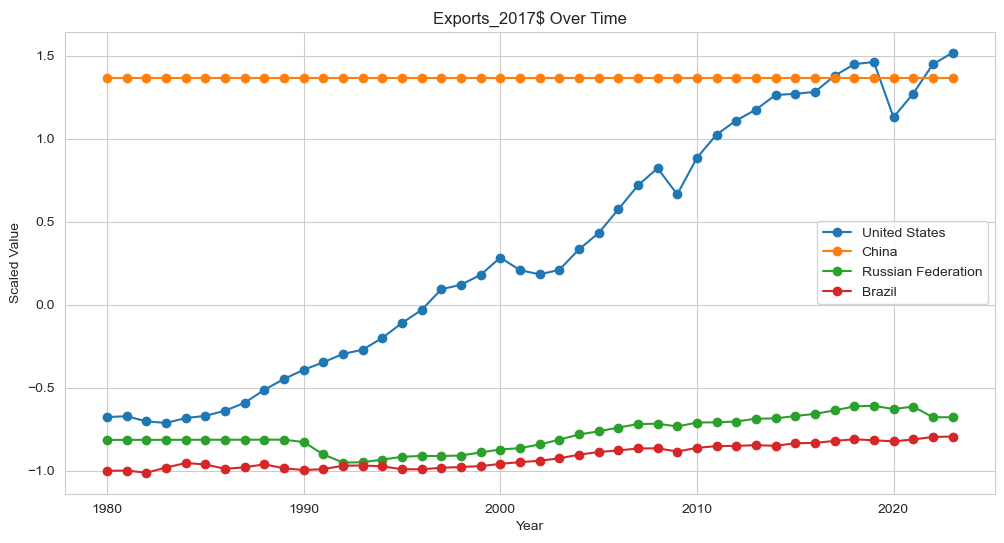

In [ ]:
# Normalised data and plotting for selected countries
# Convert date column to datetime and sort
def normalize_and_plot(df, filter_countries=True, save_fig=False, file_dir=None):
    if save_fig:
        output_dir="results"
        os.makedirs(output_dir, exist_ok=True)
    
    df_plot=df.copy()
    df_plot = df_plot.sort_values(["country", "date"])  # Ensure chronological order

    # Select relevant countries
    if filter_countries==True:
        countries = ["United States", "China", "Russian Federation", "Brazil"]
        filtered_df = df_plot[df_plot["country"].isin(countries)].copy()
    else:
        countries = list(sorted(df_plot['country'].unique()))
        filtered_df = df_plot.copy()
        
    # Define indicators for different scaling methods

    standard_indicators = [
        "Life_expectancy", "Literacy_rate", "Unemployment_rate",
        "Fertility_rate", "Poverty_ratio", "Primary_school_enrolment_rate",
        "GDPpc_2017$", "Population_total", "Energy_use", "Exports_2017$"
    ]

    log_transform_indicators = [
    ]

    # Create a new DataFrame for transformed data
    normalized_df = filtered_df.copy()

    scaler = StandardScaler()
    for indicator in standard_indicators:
        normalized_df[indicator]=scaler.fit_transform(filtered_df[[indicator]])

    ## Apply Log Transformation for selected indicators
    for indicator in log_transform_indicators:
        normalized_df[indicator] = np.log1p(normalized_df[indicator])  # log1p to avoid log(0) issues

    # Plot each indicator for all countries
    sns.set_style("whitegrid")

    for i,indicator in enumerate(standard_indicators + log_transform_indicators):
        plt.figure(figsize=(12, 6))
        for country in countries:
            subset = normalized_df[normalized_df["country"] == country]
            # Plot only available (non-null) points with "-o"
            plt.plot(subset["date"], subset[indicator], "-o", label=country)

        plt.title(f"{indicator} Over Time")
        plt.xlabel("Year")
        plt.ylabel("Scaled Value" if indicator in standard_indicators else "Log-Transformed Value")
        plt.legend()

        if save_fig:
            # Save plot as numbered PNG
            os.makedirs(f"{output_dir}/{file_dir}",exist_ok=True)
            filename = f"{output_dir}/{file_dir}/{i}_{indicator.replace('$', '').replace(' ', '_')}.png"
            plt.savefig(filename,dpi=300)
            plt.show()  # Close figure to free memory
        else:
            plt.close()

    return normalized_df

imputed_df=pd.read_csv(r"data\final_impute_world_bank_data_dev.csv")
normalised_imputed_df=normalize_and_plot(imputed_df, filter_countries=True, save_fig=True, file_dir="task1") #plotting selected countries
normalised_imputed_df=normalize_and_plot(imputed_df, filter_countries=False, save_fig=False, file_dir="task1") #normalised all the dataset
normalised_imputed_df.to_csv('data/normalised_imputed_world_bank_data_dev.csv', index=False)



### Sliding Window Sequence Generation

To prepare time-series data for downstream tasks such as dimensionality reduction or supervised learning, we applied a **sliding window** technique to construct fixed-length sequences for each country.

#### Method:
- For each country, the data was sorted chronologically (1980–2023), and a sliding window of size 5 years was applied across all indicators.
- A step size of 1 year was used to generate overlapping sequences, ensuring high temporal resolution and maximizing training data.
- Each 5-year window was flattened into a single vector by concatenating indicator values across time.
- The resulting dataset contains 40 sequences per country, each representing a 5-year developmental snapshot.

This method helps transform irregular-length time-series into a uniform representation suitable for autoencoder-based dimensionality reduction and clustering.

In [120]:
# Craete sequence with window sliding (preparing data for task 2)
normalised_df=pd.read_csv('data/normalised_imputed_world_bank_data_dev.csv')

def create_sequences(df, window_size=5, step_size=1):
    sequences = []
    countries = df['country'].unique()
    
    for country in countries:
        country_df = df[df['country'] == country].sort_values(by='date')
        indicators = country_df.columns.difference(['country', 'date'])
        
        for start in range(0, len(country_df) - window_size + 1, step_size):
            end = start + window_size
            sequence = country_df.iloc[start:end][indicators].values.flatten()
            
            if len(sequence) == window_size * len(indicators):  # Ensure proper sequence length
                formatted_sequence = ", ".join(map(str, sequence))  # Convert to comma-separated string
                sequences.append((country, formatted_sequence))
    
    return sequences

window_size=5

# Assuming 'final_imputed_df' is your DataFrame with the imputed data
sequences = create_sequences(normalised_df,window_size=window_size)

# Convert the sequences to a DataFrame for better visualization
sequences_df = pd.DataFrame(sequences, columns=['country', 'sequence'])
print("Sequences DataFrame shape:", sequences_df.shape)

# Display the first few sequences
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of each column
print(sequences_df.head(5))

# Save to CSV
sequences_df.to_csv(f'data/task2_world_bank_data_dev.csv', index=False)

Sequences DataFrame shape: (8760, 2)
       country  \
0  Afghanistan   
1  Afghanistan   
2  Afghanistan   
3  Afghanistan   
4  Afghanistan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Task 2: Dimensionality Reduction and Clustering using Autoencoder

This task aims to identify underlying clusters of countries based on their economic development indicators using an autoencoder for dimensionality reduction followed by clustering.

#### Data Input:
The input to this task is based on the **5-year overlapping sequences** generated in Task 1 using a sliding window approach. For each country, 40 flattened sequences were created from the normalized time-series data (1980–2023), capturing economic snapshots across multiple indicators.

To feed these sequences into the autoencoder, we aggregated them per country using statistical functions such as mean, variance, and skewness, resulting in a fixed-length feature vector representing the country's overall development pattern.

#### Autoencoder Design:
- We implemented a shallow autoencoder using PyTorch to learn compressed, meaningful representations of each country.
- The architecture consists of an encoder (input layer to latent layer) and a decoder (latent layer to reconstructed output).
- The model was trained using Mean Squared Error (MSE) loss to minimize the reconstruction error of the original features.

The encoder’s latent space serves as a low-dimensional embedding of the economic profile of each country.

#### Clustering and Evaluation:
- The latent representations were clustered using the K-Means algorithm to group countries with similar developmental characteristics.
- We applied t-SNE for dimensionality reduction to 2D or 3D to visualize the clusters.
- Cluster quality was evaluated using metrics such as Silhouette Score and Davies–Bouldin Index.

This pipeline allows us to uncover macro-level patterns across nations and provides a meaningful interpretation of economic similarities in the latent space.

#### References:
- Chollet, F. (2021). *Deep Learning with Python* (2nd ed.). Manning Publications.  
- Ayoosh K. (2018). [Implementing an Autoencoder in PyTorch](https://blog.paperspace.com/autoencoders-with-pytorch/) — Paperspace Blog.  
- scikit-learn [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) — scikit-learn documentation.  
- scikit-learn [`t-SNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) — scikit-learn documentation.


Using device: cuda
[[-0.33657937 -0.29072371  2.03878296 ...  0.24120932 -1.96065326
   0.52752585]
 [-0.44542559 -0.28965222 -0.51939258 ... -1.54230454 -0.71380547
   0.49678782]
 [-0.37078709 -0.14001843  0.29146652 ...  0.         -1.17002404
  -0.93440472]
 ...
 [-0.59609622 -0.2545387   1.86564214 ... -0.59174964 -1.85642898
  -1.4834192 ]
 [-0.46549755 -0.2616921   1.49643018 ...  1.9467826  -0.7427724
  -0.84701582]
 [-0.41167546 -0.27952197  0.68149239 ...  0.93698359  2.81265225
   0.18056531]]
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Isl

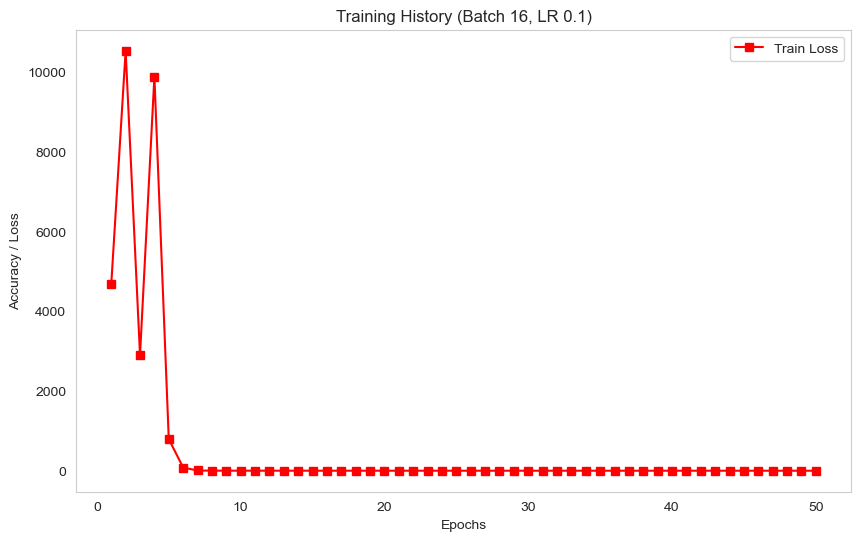

Training history plot saved at: results/task2\models\1743751907\outputs\training_history_batch16_lr0.1.png

Latent Variance for Each Dimension:
Latent Dimension 1: 115317.906250
Latent Dimension 2: 154281.296875
Latent Dimension 3: 7726.917480
Latent Dimension 4: 59497.859375


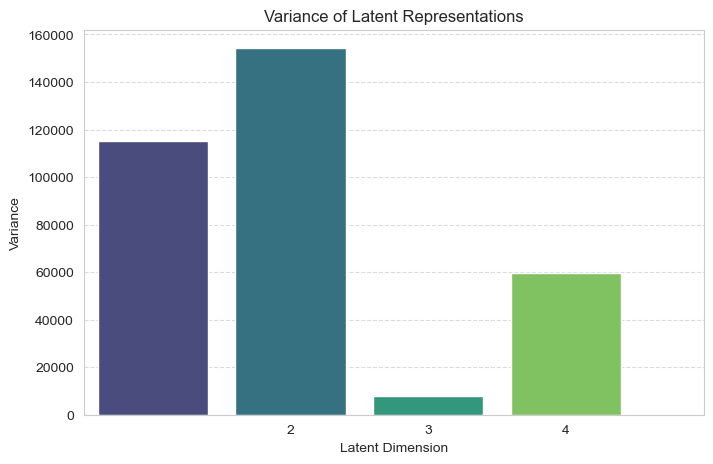

Latent variance plot saved at: results/task2\models\1743751907\outputs\latent_variance.png
                                                model_path  Silhouette Score  \
0  results/task2\models\1743751907\clusters_1743751907.pkl          0.666407   

   Davies-Bouldin Index  Calinski-Harabasz Index       WCSS  \
0              0.468442               577.324269  8145649.0   

                                                                                  best_params  \
0  {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.1, 'dropout_rate': 0, 'latent_dim': 4}   

                                                                                                                               grid_params  
0  {'batch_sizes': [16, 32], 'epochs_list': [30, 50], 'learning_rates': [0.001, 0.01, 0.1], 'dropout_rate': [0], 'latent_list': [4, 5, 6]}  
Clustering performance results saved at results/task2/clustering_performance.csv
Cluster assignments saved at: results/task2\models\1743751907\o

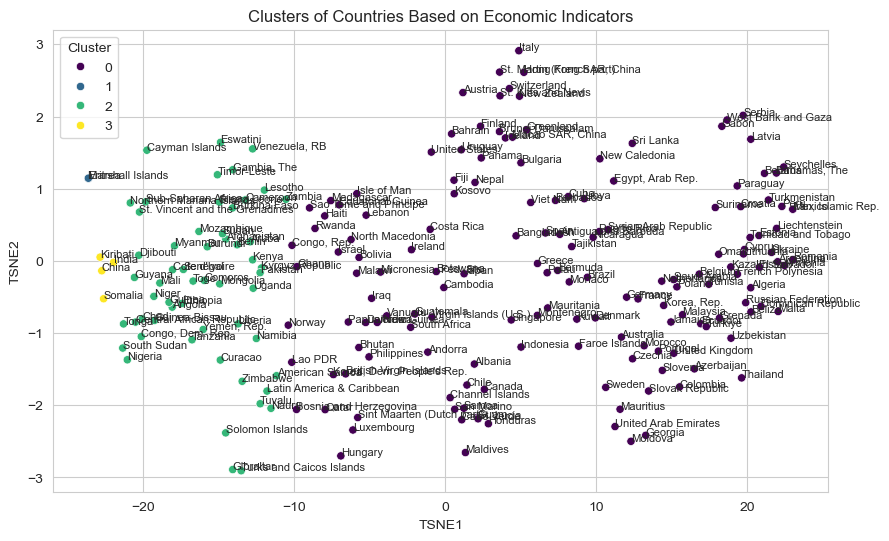

TSNE of clusters plot saved at: results/task2\models\1743751907\outputs\tsne.png


In [ ]:
# Task 2 Autoencoder model with aggregated data, then perform K-Means Clustering.
df=pd.read_csv('data/task2_world_bank_data_dev.csv')

set_seed(seed)

batch_sizes = [16, 32]
epochs_list = [30,50]
learning_rates = [0.001, 0.01, 0.1]
dropout_rate = [0]
latent_list = [4, 5, 6]

grid_params = {'batch_sizes': batch_sizes, 'epochs_list': epochs_list, 'learning_rates': learning_rates, "dropout_rate": dropout_rate, "latent_list": latent_list}

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

result_dir = f"results/task2"
os.makedirs(result_dir, exist_ok=True)
models_dir = os.path.join(result_dir, "models")
os.makedirs(models_dir, exist_ok=True)
timestamp_dir = os.path.join(models_dir, str(timestamp))
os.makedirs(timestamp_dir, exist_ok=True)
output_dir = os.path.join(timestamp_dir, "outputs")
os.makedirs(output_dir, exist_ok=True)

def preprocess_data(df, countries):
    aggregated_data = []
    country_names = []
    
    for country in countries:
        country_df = df.loc[df["country"] == country].copy()  # Avoid SettingWithCopyWarning
        
        indicator = "sequence"
        
        # Convert string representations of lists to actual lists
        if isinstance(country_df[indicator].iloc[0], str):  
            country_df.loc[:, indicator] = country_df[indicator].apply(lambda x: ast.literal_eval(x))

        # Convert tuples to lists
        if isinstance(country_df[indicator].iloc[0], tuple):  
            country_df.loc[:, indicator] = country_df[indicator].apply(list)

        if not isinstance(country_df[indicator].iloc[0], (list, np.ndarray)):
            raise ValueError(f"Indicator {indicator} is not a sequence but {type(country_df[indicator].iloc[0])}")

        # Convert sequences into NumPy array
        stacked_values = np.vstack(country_df[indicator].values)

        # Compute statistics for each time step
        stats_dict = {
            f"{indicator}_mean": np.mean(stacked_values, axis=0),
            f"{indicator}_median": np.median(stacked_values, axis=0),
            f"{indicator}_max": np.max(stacked_values, axis=0),
            f"{indicator}_min": np.min(stacked_values, axis=0),
            f"{indicator}_var": np.var(stacked_values, axis=0),
            f"{indicator}_kurtosis": np.apply_along_axis(lambda x: pd.Series(x).kurt(), 0, stacked_values),  
        }

        aggregated_data.append(np.hstack(list(stats_dict.values())))  # Flatten into a single row
        country_names.append(country)

    return np.array(aggregated_data), country_names

class EarlyStopping():
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model=None

    def __call__(self, model, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_model = model
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim, dropout):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
        
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return latent, reconstructed
    
def train_autoencoder(data, batch_size, num_epochs, lr, latent_dim, dropout):
    input_dim = data.shape[1]
    train_dataset = TensorDataset(torch.tensor(data, dtype=torch.float32).to(device))    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model = Autoencoder(input_dim, latent_dim, dropout).to(device)
    early_stopping = EarlyStopping(patience=20, min_delta=0.001)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

    train_losses = []

    for epoch in range(num_epochs):
        running_loss = 0
        for batch in train_loader:
            batch = batch[0].to(device)
            optimizer.zero_grad()
            latent, reconstructed = model(batch)
            loss = criterion(reconstructed, batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)  # Store training loss
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")
        
        scheduler.step(train_loss)

        early_stopping(model, running_loss)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    return train_losses, early_stopping.best_model
def cluster_countries(latent_data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=11)
    clusters = kmeans.fit_predict(latent_data)

    # Compute clustering metrics
    silhouette = silhouette_score(latent_data, clusters)
    davies_bouldin = davies_bouldin_score(latent_data, clusters)

    # Compute clustering metrics
    silhouette = silhouette_score(latent_data, clusters)
    davies_bouldin = davies_bouldin_score(latent_data, clusters)
    calinski_harabasz = calinski_harabasz_score(latent_data, clusters)
    wcss = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center

    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"WCSS (Within-Cluster Sum of Squares): {wcss}")

    # Save results to CSV
    performance_results = {
        "model_path": [cluster_model_path],  # Wrap scalars in lists
        "Silhouette Score": [silhouette],
        "Davies-Bouldin Index": [davies_bouldin],
        "Calinski-Harabasz Index": [calinski_harabasz], 
        "WCSS": [wcss]
    }

    return kmeans, clusters, performance_results
def save_training_history(history, plot_dir):
    plot_path = os.path.join(plot_dir, f"training_history_batch{history['batch_size']}_lr{history['lr']}.png")
    epochs = range(1, len(history["train_losses"]) + 1)

    # Create a single plot for both accuracy & loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history["train_losses"], label="Train Loss", linestyle="-", marker="s", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.legend()
    plt.grid()
    plt.title(f"Training History (Batch {history['batch_size']}, LR {history['lr']})")
    plt.savefig(plot_path)
    plt.show()
    print(f"Training history plot saved at: {plot_path}")
def visualize_latent(latent_variance, plot_dir):
    # Print variance values
    plot_path = os.path.join(plot_dir, f"latent_variance.png")
    print("\nLatent Variance for Each Dimension:")
    for i, var in enumerate(latent_variance):
        print(f"Latent Dimension {i+1}: {var:.6f}")

    # Plot variance distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(x=np.arange(1, len(latent_variance) + 1), y=latent_variance, palette="viridis")
    plt.xlabel("Latent Dimension")
    plt.ylabel("Variance")
    plt.title("Variance of Latent Representations")
    plt.xticks(range(1, len(latent_variance) + 1))
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Save plot
    plt.savefig(plot_path)
    plt.show()
    print(f"Latent variance plot saved at: {plot_path}")
def visualize_clusters(latent_data, clusters, country_names, plot_dir):
    plot_path = os.path.join(plot_dir, f"tsne.png")

    tsne = TSNE(n_components=2, random_state=seed)
    tsne_results = tsne.fit_transform(latent_data)
    
    df_viz = pd.DataFrame({
        "TSNE1": tsne_results[:, 0],
        "TSNE2": tsne_results[:, 1],
        "Cluster": clusters,
        "Country": country_names
    })
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", data=df_viz, palette="viridis", legend="full")
    for i, country in enumerate(df_viz["Country"]):
        plt.text(df_viz["TSNE1"].iloc[i], df_viz["TSNE2"].iloc[i], country, fontsize=8)
    plt.title("Clusters of Countries Based on Economic Indicators")
    plt.savefig(plot_path)
    plt.show()
    print(f"TSNE of clusters plot saved at: {plot_path}")

countries = list(sorted(df['country'].unique()))
data, country_names = preprocess_data(df, countries)
print(data)
print(country_names)

best_loss = float("inf")
best_silhouette = -1
best_params = None
history = {}  # Store loss and accuracy per epoch
final_clusters=None
final_latent_data=None
final_performance=None

cluster_model_path = os.path.join(timestamp_dir,f"clusters_{timestamp}.pkl") 

for batch_size, num_epochs, lr, latent_dim, dropout in product(batch_sizes, epochs_list, learning_rates, latent_list, dropout_rate):
    print(f"Training with batch_size={batch_size}, epochs={num_epochs}, learning_rate={lr}, 'latent_dim={latent_dim}")
    set_seed(seed)
    train_losses, trained_autoencoder = train_autoencoder(data, batch_size, num_epochs, lr, latent_dim, dropout)

    latent_data = trained_autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device))
    latent_data = latent_data.cpu().detach().numpy()
    latent_variance=np.var(latent_data, axis=0)
    print("\nLatent Variance for Each Dimension:")
    for i, var in enumerate(latent_variance):
        print(f"Latent Dimension {i+1}: {var:.6f}")

    min_variance_threshold = 1
    num_dead_neurons = np.sum(latent_variance < min_variance_threshold)
    if num_dead_neurons > 0:
        print(f"Skipping due to {num_dead_neurons} dead neurons (variance < {min_variance_threshold})")
        continue
    try:
        kmeans, clusters, performance_results = cluster_countries(latent_data)
    except ValueError as e:
        continue

    if performance_results['Silhouette Score'][0]>best_silhouette:
    # Store training history for plotting
        joblib.dump(kmeans, cluster_model_path)
        print(f"KMeans clustering model saved at {cluster_model_path}")
        final_clusters=clusters
        final_performance=performance_results
        final_latent_data=latent_data
        best_silhouette = performance_results['Silhouette Score'][0]
        best_params = {'batch_size': batch_size, 'epochs': num_epochs, 'learning_rate': lr, "dropout_rate": dropout, "latent_dim": latent_dim}
        best_model = trained_autoencoder
        history={
            'batch_size': batch_size, 'epochs': num_epochs, 'lr': lr, 'train_losses': train_losses
        }


model_path = os.path.join(timestamp_dir, f"autoencoder_{timestamp}.pth")
torch.save(best_model.state_dict(), model_path)

save_training_history(history, output_dir)
visualize_latent(np.var(final_latent_data, axis=0), output_dir)

# Perform clustering
final_performance["best_params"] = [best_params]
final_performance["grid_params"] = [grid_params]

performance_df = pd.DataFrame(final_performance)
print(performance_df)
performance_csv_path = f"{result_dir}/clustering_performance.csv"
# Check if the CSV file exists before writing
if os.path.exists(performance_csv_path):
    performance_df.to_csv(performance_csv_path, mode='a', header=False, index=False)  # Append without headers
else:
    performance_df.to_csv(performance_csv_path, index=False)  # Write with headers
print(f"Clustering performance results saved at {performance_csv_path}")

# Save clustering assignments
cluster_assignments_df = pd.DataFrame({
    "country": country_names,
    "cluster": final_clusters
})
cluster_assignments_csv_path = os.path.join(output_dir, "cluster_assignments.csv")
if os.path.exists(cluster_assignments_csv_path):
    cluster_assignments_df.to_csv(cluster_assignments_csv_path, mode='a', header=False, index=False)
else:
    cluster_assignments_df.to_csv(cluster_assignments_csv_path, index=False)
print(f"Cluster assignments saved at: {cluster_assignments_csv_path}")

# Visualize clusters
visualize_clusters(final_latent_data, final_clusters, country_names, output_dir)



# Task 3: GDP Classification Using MLP

This task aims to classify countries into four economic development levels — "Under-developed", "Developing", "Emerging", and "Developed" — based on their aggregated economic indicators.

#### Data Preparation and Labeling:
- The **GDP per capita** (in constant 2017 US$) was first **log-transformed** to reduce skewness and improve class separability.
- For each country, the **mean GDP per capita** across all years (1980–2023) was computed.
- Using `pandas.qcut`, we divided countries into four equally sized GDP-based classes.
- Country-level features were created by **aggregating** the remaining indicators (excluding GDP and date) using the mean.
- The final dataset included 221 countries with input features representing economic profiles and output labels denoting GDP class.

#### Model Architecture:
A **Multi-Layer Perceptron (MLP)** classifier was implemented using PyTorch, consisting of:
- Input Layer: number of aggregated features
- Hidden Layer 1: 128 units + Batch Normalization + ReLU + Dropout
- Hidden Layer 2: 64 units + Batch Normalization + ReLU + Dropout
- Output Layer: 4 neurons with softmax (handled by CrossEntropyLoss)

The model was trained using **CrossEntropyLoss**, with class weights computed from the inverse class frequency to handle class imbalance.

#### Training Procedure:
- The dataset was split into **80% training** and **20% testing** subsets.
- Inputs were **standardized** using `StandardScaler` to ensure each feature contributed equally.
- A **grid search** was performed across combinations of:
  - Learning rates: [0.0001]
  - Batch sizes: [16, 32]
  - Epochs: [50, 100, 150]

- For each configuration, **5-fold cross-validation** was used to assess generalization, with early stopping applied based on validation loss.

#### Evaluation Metrics:
After selecting the best-performing model, we retrained it on the full training data and evaluated it on the test set. Key metrics included:
- **Accuracy**
- **Precision, Recall, F1-score** (per class and macro-averaged)
- **Confusion Matrix** (visualized)
- **Training/Validation Loss and Accuracy Curves**

All results, metrics, and model artifacts were saved for reproducibility and comparison.

#### References:
- pandas [`qcut`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) — pandas documentation  
- scikit-learn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)  
- PyTorch [`torch.nn`](https://pytorch.org/docs/stable/nn.html) — PyTorch documentation  
- Brownlee, J. (2023). [Building Multilayer Perceptron Models in PyTorch](https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/) — Machine Learning Mastery


Using device: cuda
Training in KFold(n_splits=5, random_state=11, shuffle=True) Fold CV with LR=0.0001, Batch=16, Epochs=50
Fold 1/5
Epoch 1/50 | Train Loss: 1.4495, Val Loss: 1.3767, Train Acc: 0.2714, Val Acc: 0.2571
Validation loss improved! Model saved to results/task3\models\1743756849\params_tune\best_model_lr1_bs16_ep50.pth
Epoch 1/50 | Train Loss: 1.4495
Epoch 2/50 | Train Loss: 1.4163, Val Loss: 1.3576, Train Acc: 0.3214, Val Acc: 0.2857
Validation loss improved! Model saved to results/task3\models\1743756849\params_tune\best_model_lr1_bs16_ep50.pth
Epoch 2/50 | Train Loss: 1.4163
Epoch 3/50 | Train Loss: 1.3950, Val Loss: 1.3388, Train Acc: 0.3000, Val Acc: 0.3429
Validation loss improved! Model saved to results/task3\models\1743756849\params_tune\best_model_lr1_bs16_ep50.pth
Epoch 3/50 | Train Loss: 1.3950
Epoch 4/50 | Train Loss: 1.4033, Val Loss: 1.3119, Train Acc: 0.3286, Val Acc: 0.3429
Validation loss improved! Model saved to results/task3\models\1743756849\params_tune\

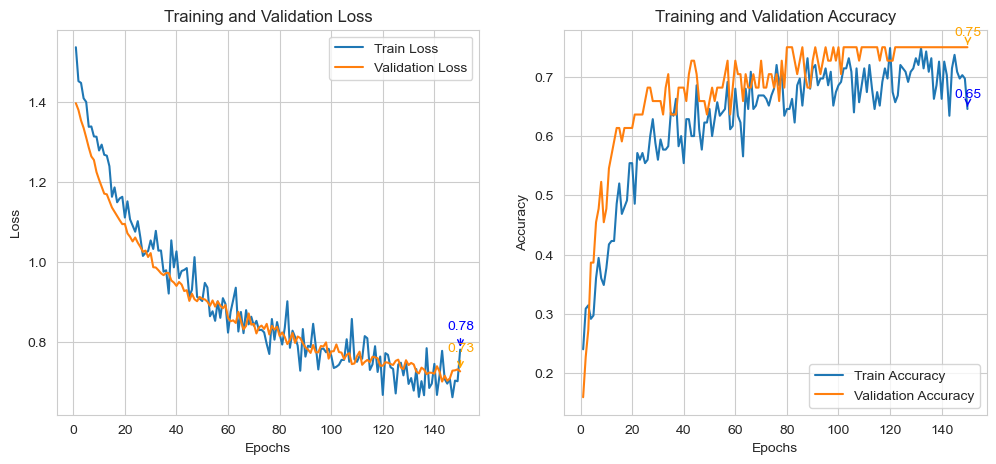

Training history saved to results/task3\models\1743756849\outputs\training_history.png


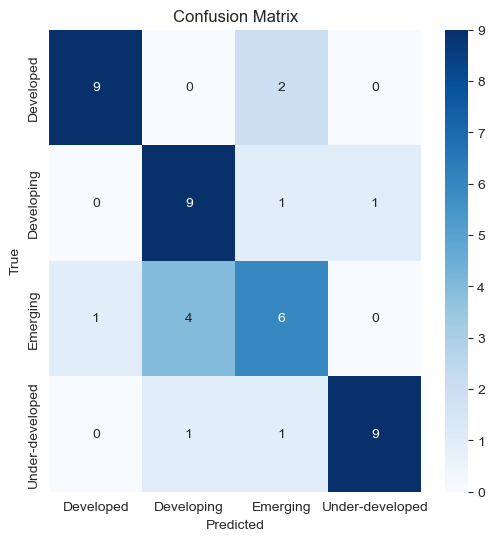

Confusion matrix saved to results/task3\models\1743756849\outputs\confusion_matrix.png
                                            model_path  \
12  results/task3\models\1743756849\gdp_classifier.pth   

                                             params            tp  \
12  {'lr': 0.0001, 'batch_size': 16, 'epochs': 150}  [9, 9, 6, 9]   

              fp                tn            fn  accuracy  precision  recall  \
12  [1, 5, 4, 1]  [32, 28, 29, 32]  [2, 2, 5, 2]      0.75   0.760714    0.75   

    f1-score  
12  0.751429  


In [153]:
# GDP classifer with aggregated_data (categorized by log transform gdp)
imputed_df=pd.read_csv('data/final_impute_world_bank_data_dev.csv')

set_seed(seed)

scoring_metric="loss" #"f1" "loss" "accuracy"
batch_sizes=[16, 32]
epochs_list=[50, 100, 150]
learning_rates=[0.0001] 

k_folds=5

result_dir = "results/task3"
os.makedirs(result_dir, exist_ok=True)
models_dir = os.path.join(result_dir, "models")
os.makedirs(models_dir, exist_ok=True)
time_models_dir = os.path.join(models_dir, str(timestamp))
os.makedirs(time_models_dir, exist_ok=True)
output_dir = os.path.join(time_models_dir, "outputs")
os.makedirs(output_dir, exist_ok=True)
params_tune_dir=os.path.join(time_models_dir,"params_tune")
os.makedirs(params_tune_dir, exist_ok=True)
graphs_dir=os.path.join(time_models_dir,"outputs")
os.makedirs(graphs_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess data
def load_and_preprocess_data(df):
    log_transform_indicators = [
        "GDPpc_2017$", "Population_total", "Energy_use", "Exports_2017$"
    ]

    for indicator in log_transform_indicators:
        df[indicator] = np.log1p(df[indicator])  # log1p to avoid log(0) issues


    avg_gdp = df.groupby('country')['GDPpc_2017$'].mean().reset_index()
    avg_gdp['GDP_class'] = pd.qcut(avg_gdp['GDPpc_2017$'], q=4, 
                                  labels=["Under-developed", "Developing", "Emerging", "Developed"])

    features = df.columns.difference(['country', 'date', 'GDPpc_2017$'])
    aggregated_data = df.groupby('country')[features].mean().reset_index()
    merged_data = aggregated_data.merge(avg_gdp[['country', 'GDP_class']], on='country')

    le = LabelEncoder()
    merged_data['label'] = le.fit_transform(merged_data['GDP_class'])

    X = merged_data.drop(['country', 'GDP_class', 'label'], axis=1).values
    y = merged_data['label'].values

    # Handle class imbalance
    class_counts = np.bincount(y)
    class_weights = 1.0 / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

    return X, y, le, class_weights

class EarlyStopping():
    def __init__(self, patience=5, min_delta=0, verbose=True, path="best_model.pth"):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.path = path  # File path to save best model
        self.best_loss = float("inf")
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:  # Check for improvement
            self.best_loss = val_loss
            self.counter = 0  # Reset counter

            # Save the best model state (both to disk and memory)
            self.best_model_state = model.state_dict()
            torch.save(model.state_dict(), self.path, _use_new_zipfile_serialization=False)

            if self.verbose:
                print(f"Validation loss improved! Model saved to {self.path}")

        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience} (No improvement)")

            if self.counter >= self.patience:  # Stop if patience exceeded
                self.early_stop = True
                if self.verbose:
                    print(f"Early stopping triggered after {self.patience}")

class GDPClassifier(nn.Module):
    def __init__(self, input_size):
        super(GDPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)
        self.fc3 = nn.Linear(64, 4)
        self.dropout = nn.Dropout(0.4)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Training function with early stopping
def train_model(input_shape, train_loader, val_loader, epochs, lr, class_weights, model_path=None):
    model = GDPClassifier(input_size=input_shape).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    early_stopping = EarlyStopping(patience=10, min_delta=0.001, path=model_path)
    
    val_f1s = []
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct_train, total_train = 0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss /= len(train_loader)
        train_accuracy = correct_train / total_train

        train_losses.append(train_loss)  # Store training loss
        train_accuracies.append(train_accuracy)  # Store training accuracy

        if val_loader is not None:
            # Validation evaluation
            model.eval()
            val_loss = 0
            correct_val, total_val = 0, 0
            all_preds, all_labels = [], []
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    all_preds.append(predicted)
                    all_labels.append(labels)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()

            val_loss /= len(val_loader)
            val_accuracy = correct_val / total_val

            all_val_preds = torch.cat(all_preds)
            all_val_labels = torch.cat(all_labels)
            val_f1 = f1_score(all_val_labels.cpu().numpy(), all_val_preds.cpu().numpy(), average="weighted")
            val_f1s.append(val_f1)

            val_losses.append(val_loss)  # Store validation loss
            val_accuracies.append(val_accuracy)  # Store validation accuracy

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

            early_stopping(val_loss, model)

            if early_stopping.early_stop:
                print("Early stopping triggered. Restoring best model weights...")
                model.load_state_dict(early_stopping.best_model_state)  # Restore Best Model
                break
            else:
                print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}")
    if val_loader is not None:
        return train_losses, train_accuracies, val_losses, val_accuracies, val_f1s, early_stopping.best_loss, early_stopping.path
    else:
        return train_losses, train_accuracies, None, None, None, None, model_path
def evaluate_model(model, test_loader, le):
    model.to(device)
    model.eval()
    y_true, y_pred = [], []
    all_outputs = []    

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure same device
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())

    print(classification_report(y_true, y_pred, target_names=le.classes_))

    # Compute confusion matrix and metrics
    cm = confusion_matrix(y_true, y_pred)

    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + tp + fn)
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + tp + fn)

    # Compute per-class precision, recall, F1-score, and accuracy
    precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
    recall = np.diag(cm) / np.sum(cm, axis=1)  # TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)  # Overall accuracy

    precision = np.nanmean(precision)  # Mean precision across classes
    recall = np.nanmean(recall)  # Mean recall across classes
    f1_score = np.nanmean(f1_score)  # Mean F1-score across classes

    return cm, [tp.tolist(), fp.tolist(), tn.tolist(), fn.tolist(), accuracy, precision, recall, f1_score]
def save_training_history(history, plot_path):
    plot_path = os.path.join(plot_path, f"training_history.png")

    epochs = range(1, len(history["train_losses"]) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_losses"], label='Train Loss')
    plt.plot(epochs, history["test_losses"], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.annotate(f"{history['train_losses'][-1]:.2f}", xy=(epochs[-1], history["train_losses"][-1]),
                 xytext=(epochs[-1] - 5, history["train_losses"][-1] + 0.05),
                 arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")
    plt.annotate(f"{history['test_losses'][-1]:.2f}", xy=(epochs[-1], history["test_losses"][-1]),
                 xytext=(epochs[-1] - 5, history["test_losses"][-1] + 0.05),
                 arrowprops=dict(arrowstyle="->", color="orange"), fontsize=10, color="orange")
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_accuracies"], label='Train Accuracy')
    plt.plot(epochs, history["test_accuracies"], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.annotate(f"{history['train_accuracies'][-1]:.2f}", xy=(epochs[-1], history["train_accuracies"][-1]),
                 xytext=(epochs[-1] - 5, history["train_accuracies"][-1] + 0.02),
                 arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")
    plt.annotate(f"{history['test_accuracies'][-1]:.2f}", xy=(epochs[-1], history["test_accuracies"][-1]),
                 xytext=(epochs[-1] - 5, history["test_accuracies"][-1] + 0.02),
                 arrowprops=dict(arrowstyle="->", color="orange"), fontsize=10, color="orange")
    plt.savefig(plot_path, bbox_inches='tight')
    plt.show()
    
    print(f"Training history saved to {plot_path}")
    
def save_cm_figure(cm, plot_path):
    plot_path = os.path.join(plot_path, f"confusion_matrix.png")

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.savefig(plot_path)
    plt.show()
    print(f"Confusion matrix saved to {plot_path}")

df_task3 = imputed_df.copy()
X, y, le, class_weights = load_and_preprocess_data(df_task3)

# K-Fold CV Training
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=seed, shuffle=True, stratify=y
)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)  # Fit on training data
test_X = scaler.transform(test_X)  # Transform validation data using the same scaler

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

best_model_info = {"accuracy": -1, "loss": float("inf"), "f1": -1, "params": {}, "grid_search_params":{}, "path": None}
param_grid = product(batch_sizes, epochs_list, learning_rates)

for batch_size, epochs, lr in param_grid:
    set_seed(seed)
    print(f"Training in {kfold} Fold CV with LR={lr}, Batch={batch_size}, Epochs={epochs}")

    model_path = f"best_model_lr{int(lr*10000)}_bs{batch_size}_ep{epochs}.pth"
    tune_model_path=os.path.join(params_tune_dir, model_path)

    fold_accuracies = []
    fold_losses = []
    fold_f1s = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_X)):
        print(f"Fold {fold+1}/{k_folds}")

        X_train, X_val = train_X[train_idx], train_X[val_idx]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        # Create train and validation datasets
        train_X_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
        val_X_tensor = torch.tensor(X_val, dtype=torch.float32, device=device)
        train_y_tensor = torch.tensor(y_train, dtype=torch.long, device=device)
        val_y_tensor = torch.tensor(y_val, dtype=torch.long, device=device)
        
        train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
        val_dataset = TensorDataset(val_X_tensor, val_y_tensor)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model
        train_losses, train_accuracies, val_losses, val_accuracies, val_f1s, val_loss, saved_path=train_model(train_X_tensor.shape[1], train_loader, val_loader, epochs, lr, class_weights, model_path=tune_model_path)

        # Store fold history
        fold_accuracies.append(max(val_accuracies))  
        fold_losses.append(val_loss)
        fold_f1s.append(max(val_f1s))  # Store last validation accuracy for this fold

    # Compute average accuracy across folds
    avg_f1 = sum(fold_f1s) / k_folds
    avg_acc = sum(fold_accuracies) / k_folds
    avg_loss =sum(fold_losses) / k_folds

    # Update best model if the current one is better
    if (scoring_metric == "accuracy" and avg_acc > best_model_info["accuracy"]) or \
            (scoring_metric == "loss" and avg_loss < best_model_info["loss"]) or \
                (scoring_metric == "f1" and avg_f1 > best_model_info["f1"]):
        best_model_info = {
            "accuracy": avg_acc,
            "loss": avg_loss,
            "f1": avg_f1,
            "params": {
                "lr": lr,
                "batch_size": batch_size,
                "epochs": epochs
            },
            "grid_search_params": {
                "learning_rates": learning_rates,
                "batch_sizes": batch_sizes,
                "epochs_list": epochs_list
            },
            "path": saved_path
        }

best_model_info_path=f"{time_models_dir}/best_model_info.json"
with open(best_model_info_path, "w") as json_file:
    json.dump(best_model_info, json_file, indent=4)

with open(best_model_info_path, "r") as file:
    config=json.load(file)

best_params=config["params"]

final_model_path=os.path.join(time_models_dir, f"gdp_classifier.pth")

#train best model
train_X_tensor = torch.tensor(train_X, dtype=torch.float32, device=device)
test_X_tensor = torch.tensor(test_X, dtype=torch.float32, device=device)
train_y_tensor = torch.tensor(train_y, dtype=torch.long, device=device)
test_y_tensor = torch.tensor(test_y, dtype=torch.long, device=device)

train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader= DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=True)

train_losses, train_accuracies, test_losses, test_accuracies, test_f1s, test_loss, model_path=train_model(train_X_tensor.shape[1], train_loader, test_loader, best_params['epochs'], best_params['lr'], class_weights, model_path=final_model_path)
history={
        'batch_size': batch_size, 'epochs': epochs, 'lr': lr, 
        'train_losses': train_losses, 'test_losses': test_losses,
        'train_accuracies': train_accuracies, 'test_accuracies': test_accuracies,
    }

model = GDPClassifier(input_size=test_X_tensor.shape[1])
model.load_state_dict(torch.load(model_path))
cm, results=evaluate_model(model, test_loader, le)

save_training_history(history, plot_path=output_dir)
save_cm_figure(cm, plot_path=output_dir)

# Save results
os.makedirs(result_dir, exist_ok=True)
result_path = f"{result_dir}/results.csv"
file_exists = os.path.isfile(result_path)
header = ["model_path", "params", "tp", "fp", "tn", "fn", "accuracy", "precision", "recall", "f1-score"]

results=[model_path, best_params] + results

with open(result_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write header if the file does not exist
    if not file_exists:
        writer.writerow(header)
    # Write the statistics
    writer.writerow(results)

task3_result_df = pd.read_csv(result_path)
print(task3_result_df.tail(1))



# Task 4: Time-Series GDP Forecasting Using Deep Learning Models

### Task 4: Time-Series GDP Forecasting Using Deep Learning Models

This task focuses on forecasting each country's **GDP per capita** over the next 5 years using its preceding 10 years of economic indicators. We implement and compare three deep learning architectures: **LSTM**, **CNN-LSTM**, and **Transformer**.

#### Data Preparation:
- The dataset consists of normalized, imputed indicators from Task 1, covering 1980–2023 for 221 countries.
- Key features include 9 economic indicators (e.g., life expectancy, literacy rate, energy use) and one-hot encoded country identifiers.
- For each country:
  - We constructed **10-year input windows** and **5-year GDP targets** using a sliding window.
  - Countries with fewer than 15 years of data were excluded.
- The data was split into:
  - **Training set** (earlier sequences),
  - **Validation set** (middle sequences),
  - **Test set** (most recent sequences per country).

#### Feature Engineering:
- GDP values were **log-transformed** to stabilize variance.
- All other features were **standardized** using `StandardScaler`, fitted only on training data.
- Each sequence is a 3D tensor: `(batch_size, sequence_length=10, num_features=229)`.

#### Model Architectures:
We explored three architectures using PyTorch:

1. **LSTM**:
   - 2-layer stacked LSTM
   - 128 hidden units
   - Dropout and fully connected output layer
   - Captures temporal dependencies effectively

2. **CNN-LSTM**:
   - 1D convolutional layer extracts local temporal patterns from features
   - Followed by max pooling and LSTM layers
   - Combines spatial feature extraction with temporal modeling

3. **Transformer Encoder**:
   - Linear embedding of input followed by multi-head self-attention
   - 2 encoder layers with positional encoding and layer normalization
   - Captures long-range dependencies efficiently without recurrence

All models output a vector of 5 predicted GDP values, corresponding to the 5-year forecast horizon.

#### Training Procedure:
- All models were trained using **MSE loss** and the **Adam optimizer**.
- A small hyperparameter grid search was conducted:
  - Learning rate: `0.0001`
  - Batch sizes: `[16]`
  - Epochs: `[50]`
  - Dropout: `[0]`
- **Early stopping** was used to prevent overfitting.
- The best-performing model for each architecture was selected based on validation loss.

#### Evaluation Metrics:
On the held-out test set, the models were evaluated using:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)**

All predicted GDP values were inverse-transformed (`expm1`) for interpretability.

#### Visualization:
- We plotted **actual vs. predicted GDP** over 5 years for selected countries:
  - United States, China, Russia, Brazil, Switzerland, and Denmark
- These plots help visualize performance trends across diverse economic conditions.

#### Output:
- Model checkpoints, training history plots, predictions, and metrics were saved to `results/task4/`.
- Summary results for all models were compiled in `results/task4/results.csv`.

#### References:
- PyTorch [`nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) — PyTorch documentation  
- Vaswani, A., *et al.* (2017). ["Attention is All You Need"](https://arxiv.org/abs/1706.03762) — *NeurIPS*  
- Brownlee, J. (2021). [Time Series Forecasting with the Transformer Model in PyTorch](https://machinelearningmastery.com/the-transformer-model/) — Machine Learning Mastery  
- Rahman, M. (2022). [Combine CNN and LSTM using PyTorch – Different Ways to Combine CNN and LSTM Networks for Time Series Classification Tasks](https://mijahr.medium.com/combine-cnn-and-lstm-using-pytorch-different-ways-to-combine-cnn-and-lstm-networks-for-time-series-f2b57b03c1c1) — *Medium*


Using device: cuda
Total Training Sequences: 4818
Total Validation Sequences: 657
Total Test Sequences: 1095
Shapes after scaling:
X_train: (4818, 10, 229), y_train: (4818, 5)
X_val: (657, 10, 229), y_val: (657, 5)
X_test: (1095, 10, 229), y_test: (1095, 5)
Training LSTM with Dropout=0, LR=0.001, Batch=16, Epochs=50
Epoch 1/50 | Train Loss: 9.0503 | Val Loss: 1.4972
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_LSTM_drop0_lr10_bs16_ep50.pth
Epoch 2/50 | Train Loss: 0.6931 | Val Loss: 0.0760
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_LSTM_drop0_lr10_bs16_ep50.pth
Epoch 3/50 | Train Loss: 0.0527 | Val Loss: 0.0797
EarlyStopping counter: 1/10 (No improvement)
Epoch 4/50 | Train Loss: 0.0422 | Val Loss: 0.0612
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_LSTM_drop0_lr10_bs16_ep50.pth
Epoch 5/50 | Train Loss: 0.0362 | Val Loss: 0.0455
Vali

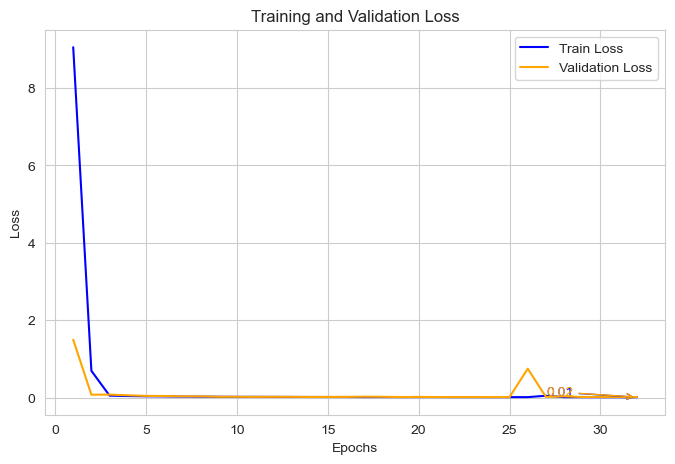

Training history saved to results/task4\models\1743751907\outputs/LSTM_best_model_training_graph
['results/task4\\models\\1743751907\\LSTM.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 32624394.0, 2914.56005859375, 13.263162970542908]
Training CNN-LSTM with Dropout=0, LR=0.001, Batch=16, Epochs=50
Epoch 1/50 | Train Loss: 6.9750 | Val Loss: 0.2117
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 2/50 | Train Loss: 0.1477 | Val Loss: 0.1186
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 3/50 | Train Loss: 0.1015 | Val Loss: 0.0701
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 4/50 | Train Loss: 0.0872 | Val Loss: 0.1069
EarlyStopping counter: 1/10 (No improvement)
Epoch 5/50 | Train Loss: 0.0744 | Val L

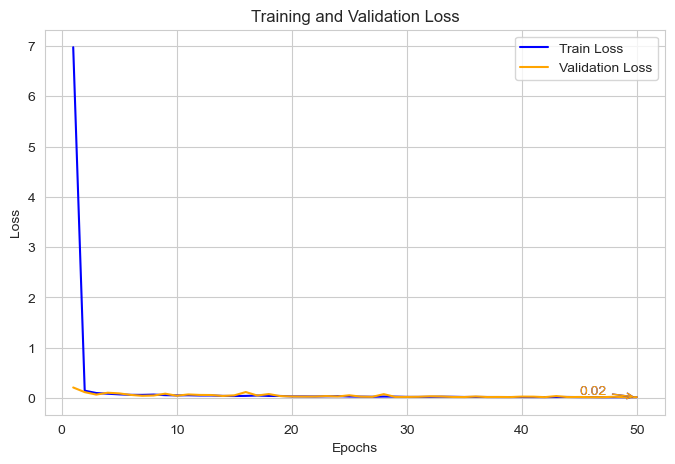

Training history saved to results/task4\models\1743751907\outputs/CNN-LSTM_best_model_training_graph
['results/task4\\models\\1743751907\\CNN-LSTM.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 45682996.0, 3570.40087890625, 15.254838764667511]
Training Transformer with Dropout=0, LR=0.001, Batch=16, Epochs=50
Epoch 1/50 | Train Loss: 9.7636 | Val Loss: 0.4293
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 2/50 | Train Loss: 0.1104 | Val Loss: 0.0640
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 3/50 | Train Loss: 0.0449 | Val Loss: 0.0483
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 4/50 | Train Loss: 0.0386 | Val Loss: 0.0583
EarlyStopping counter: 1/10 (No improvement)
Epoch 5/50 | Train 

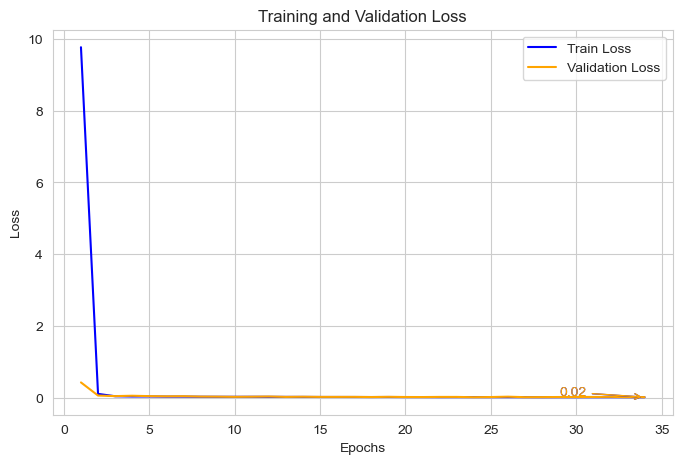

Training history saved to results/task4\models\1743751907\outputs/Transformer_best_model_training_graph
['results/task4\\models\\1743751907\\Transformer.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 40494716.0, 3322.397705078125, 14.328394830226898]
                                         model_path  \
9          results/task4\models\1743751907\LSTM.pth   
10     results/task4\models\1743751907\CNN-LSTM.pth   
11  results/task4\models\1743751907\Transformer.pth   

                                                         params         mse  \
9   {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  32624394.0   
10  {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  45682996.0   
11  {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  40494716.0   

            mae       mape  
9   2914.560059  13.263163  
10  3570.400879  15.254839  
11  3322.397705  14.328395  


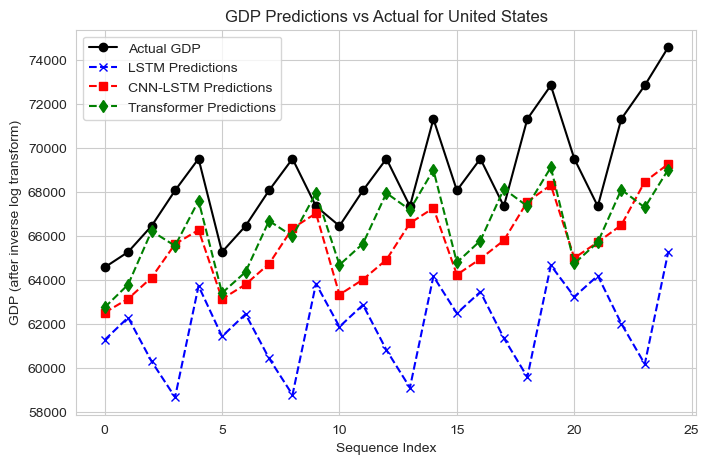

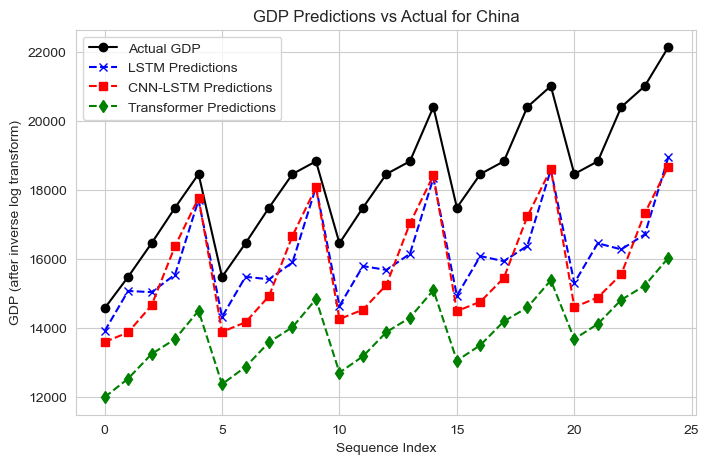

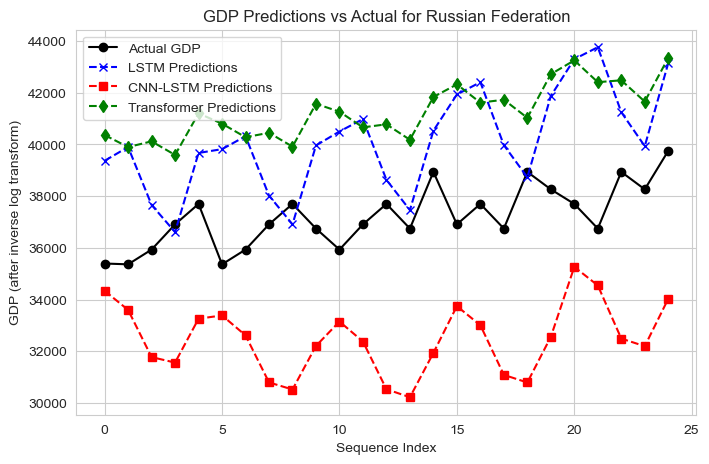

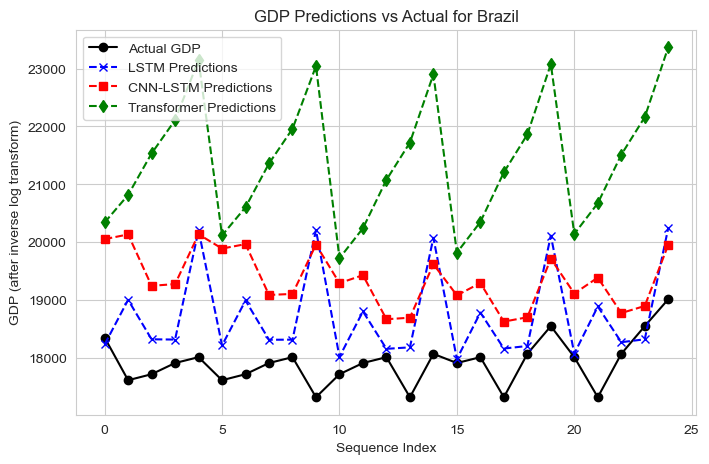

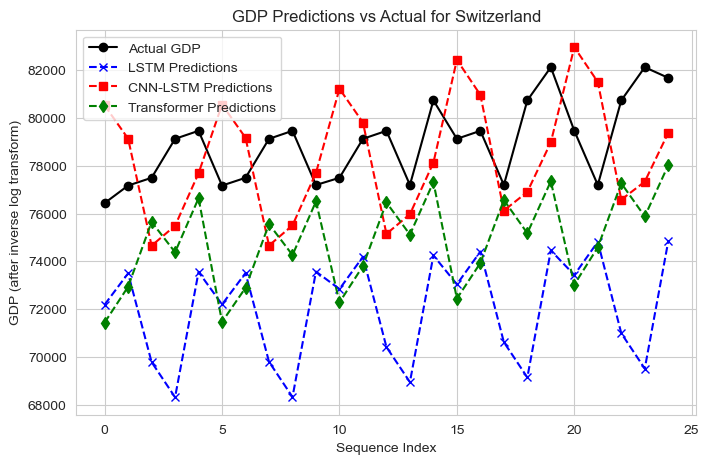

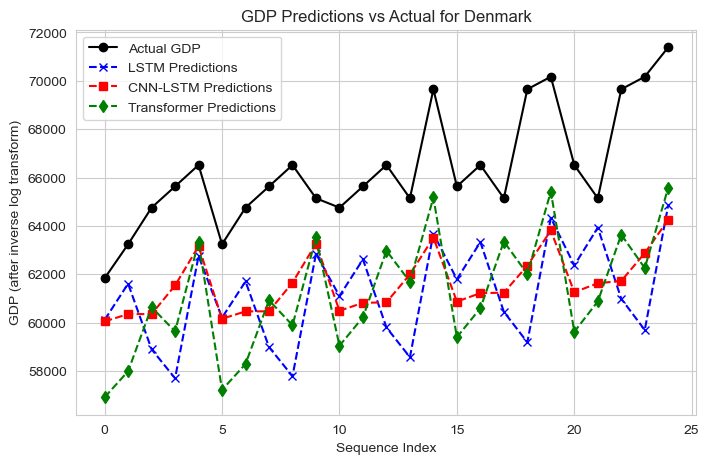

In [ ]:
# LSTM, CNN-LSTM, Tranformer for predicting next 5 years gdp based on 10 years data
models=["LSTM","CNN-LSTM","Transformer"]  #"CNN-LSTM" "Transformer" "LSTM"
dropout_options = [0]
learning_rates = [0.0001]
batch_sizes = [16]
epochs_list = [50]

sequences_per_country = 30
test_size = 5
val_size = 3

set_seed(seed)

result_dir = "results/task4"
os.makedirs(result_dir, exist_ok=True)
models_dir = os.path.join(result_dir, "models")
os.makedirs(models_dir, exist_ok=True)
time_models_dir = os.path.join(models_dir, str(timestamp))
os.makedirs(time_models_dir, exist_ok=True)
data_dir=os.path.join(time_models_dir,"data")
os.makedirs(data_dir, exist_ok=True)
params_tune_dir=os.path.join(time_models_dir,"params_tune")
os.makedirs(params_tune_dir, exist_ok=True)
output_dir=os.path.join(time_models_dir,"outputs")
os.makedirs(output_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

features = [
        "Population_total", "Life_expectancy", "Literacy_rate", "Unemployment_rate",
        "Energy_use", "Fertility_rate", "Poverty_ratio", "Primary_school_enrolment_rate", "Exports_2017$"
    ]
target = "GDPpc_2017$"

# ---------------------- Data Preparation ----------------------
df = pd.read_csv(r"data/final_impute_world_bank_data_dev.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y")
df = df.sort_values(["country", "date"]).reset_index(drop=True)

#  One-hot encode country names 
df_countries = pd.get_dummies(df["country"], prefix="Country").astype(int)
country_features = df_countries.shape[1]           # e.g., 219

# Scale GDP before log transformation
df[target] = np.log1p(df[target])

# Concatenate one-hot encoded countries
df_scaled = pd.concat([df, df_countries], axis=1)
features = features + list(df_countries.columns)

# ---------------------- Sequence Creation ----------------------
def create_sequences(data, input_length=10, output_length=5):
    """Generate sliding window sequences."""
    X, y = [], []
    
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i+input_length, :]) 
        y.append(data[i+input_length:i+input_length+output_length, 0])  # GDP target
    return np.array(X), np.array(y)


# ----------------------- Preparing Train, Val, Test data ----------------------
all_X_train, all_y_train, all_X_val, all_y_val, all_X_test, all_y_test = [], [], [], [], [], []
test_country_labels = []

for country in df["country"].unique():
    country_data = df_scaled[df_scaled["country"] == country][[target]+features].values
    #  Ensure at least 15 years of data exist for a full sequence 
    if len(country_data) < 15:
        print(f"⚠ Skipping {country} needs at least 15).")
        continue

    #  Create sequences for the country 
    X, y = create_sequences(country_data)
    train_size = len(X) - test_size - val_size

    X_train, y_train = X[:train_size], y[:train_size]  
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]  
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]  # Last 5 sequences → Test Set

    #  Append Data 
    all_X_train.append(X_train)
    all_y_train.append(y_train)
    all_X_val.append(X_val)
    all_y_val.append(y_val)
    all_X_test.append(X_test)
    all_y_test.append(y_test)

    #  Ensure Each Country Has Test Data 
    test_country_labels.extend([country] * len(X_test))

# Convert lists to numpy arrays
X_train = np.concatenate(all_X_train, axis=0)
y_train = np.concatenate(all_y_train, axis=0)
X_val = np.concatenate(all_X_val, axis=0)
y_val = np.concatenate(all_y_val, axis=0)
X_test = np.concatenate(all_X_test, axis=0)
y_test = np.concatenate(all_y_test, axis=0)

# ---------------------- Verify Data Splitting ----------------------
print(f"Total Training Sequences: {sum(len(x) for x in all_X_train)}")
print(f"Total Validation Sequences: {sum(len(x) for x in all_X_val)}")
print(f"Total Test Sequences: {sum(len(x) for x in all_X_test)}")

# ---------------------- Feature Scaling After Splitting ----------------------
num_features_total = X_train.shape[2]
# Flatten all training sequences to (n_samples*seq_len, n_features)
train_data_flat = np.concatenate([
    x.reshape(-1, num_features_total)
    for x in all_X_train
])

task4_scaler = StandardScaler().fit(train_data_flat)  # Fit only once on training data

# Function to scale features while keeping GDP unchanged
def scale_sequences(sequences):
    num_features_total = sequences.shape[2]  # 229
    flat = sequences.reshape(-1, num_features_total)
    flat_scaled = task4_scaler.transform(flat)
    return flat_scaled.reshape(sequences.shape)

# Apply scaling
X_train_scale = scale_sequences(np.concatenate(all_X_train))
X_val_scale = scale_sequences(np.concatenate(all_X_val))
X_test_scale = scale_sequences(np.concatenate(all_X_test))

# Verify shapes
print(f"Shapes after scaling:")
print(f"X_train: {X_train_scale.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val_scale.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test_scale.shape}, y_test: {y_test.shape}")

class GDPDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMModel(nn.Module):
    def __init__(self, hidden_size=128, num_layers=2, dropout_rate=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=229, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, 5)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

class CNNLSTMModel(nn.Module):
    def __init__(self, input_size=229, output_size=5, hidden_size=128, num_layers=1, dropout_rate=0):
        super(CNNLSTMModel, self).__init__()
        self.conv = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm1d(64)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2) 
        self.lstm = nn.LSTM(64, hidden_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (batch, features, seq_len)
        x = self.conv(x)
        x = self.bn(x)  # Apply BatchNorm
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.permute(0, 2, 1)  # (batch, seq_len, features)
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=10, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):
    def __init__(self, input_size=229, output_size=5, d_model=64, nhead=8, num_layers=2, dropout_rate=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, d_model) 
        self.pos_encoder = PositionalEncoding(d_model, max_len=10, dropout=dropout_rate)

        # Transformer Encoder with Dropout
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dim_feedforward=4 * d_model,  # Usually 4x d_model for FFN
            dropout=dropout_rate,
            batch_first=True
        )

        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        
        # Fully Connected Output Layer with Dropout
        self.fc = nn.Sequential(
            nn.LayerNorm(d_model),  # Layer Normalization before FC
            nn.Dropout(dropout),  
            nn.Linear(d_model, output_size)
        )

    def forward(self, x):
        x = self.embedding(x)  # Linear embedding
        # x = self.pos_encoder(x)
        x = self.transformer(x)  # Transformer Encoder
        x = x[:, -1, :]  # Get last time step
        return self.fc(x)  # Fully Connected Layer

# Training function with early stopping
def train_model(model, train_loader, val_loader, epochs=100, lr=0.001, model_path=None):
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    early_stopping = EarlyStopping(patience=10, min_delta=0.001, path=model_path)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb, yb = xb.to(device), yb.to(device)
                    preds = model(xb)
                    loss = criterion(preds, yb)
                    val_loss += loss.item()
            val_loss /= len(val_loader)
            val_losses.append(val_loss)

            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

            early_stopping(val_loss, model)

            if early_stopping.early_stop:
                print("Early stopping triggered. Restoring best model weights...")
                model.load_state_dict(early_stopping.best_model_state)  # Restore Best Model
                break

        else:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}")

    if val_loader is not None:
        return train_losses, val_losses, early_stopping.best_loss, early_stopping.path
    else:
        return train_losses, None, None, model_path
    
def evaluate_model(model, loader, test_countries):
    model.to(device)
    model.eval()
    actuals, predictions, country_labels = [], [], []

    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(loader):
            X, y = X.to(device), y.to(device)
            pred = model(X).cpu().numpy()

            predictions.append(pred)
            actuals.append(y.cpu().numpy())

            # Ensure batch-country mapping is correct
            batch_start = batch_idx * loader.batch_size
            batch_end = batch_start + len(y)  # Handle cases where batch < batch_size
            country_labels.extend(test_countries[batch_start:batch_end])

    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)

    #  Denormalize GDP values 
    predictions = np.expm1(predictions)
    actuals = np.expm1(actuals)

    #  Compute Metrics 
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    return actuals, predictions, country_labels, [mse, mae, mape]

def save_training_history(history, plot_path):
    epochs = range(1, len(history["train_losses"]) + 1)

    plt.figure(figsize=(8, 5))

    # Plot training loss
    plt.plot(epochs, history["train_losses"], label="Train Loss", color="blue")
    
    # Plot validation loss only if available
    if "val_losses" in history and history["val_losses"]:
        plt.plot(epochs, history["val_losses"], label="Validation Loss", color="orange")

        # Annotate last values
        plt.annotate(f"{history['train_losses'][-1]:.2f}", xy=(epochs[-1], history["train_losses"][-1]),
                     xytext=(epochs[-1] - 5, history["train_losses"][-1] + 0.05),
                     arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")

        plt.annotate(f"{history['val_losses'][-1]:.2f}", xy=(epochs[-1], history["val_losses"][-1]),
                     xytext=(epochs[-1] - 5, history["val_losses"][-1] + 0.05),
                     arrowprops=dict(arrowstyle="->", color="orange"), fontsize=10, color="orange")

    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.savefig(plot_path, bbox_inches="tight")
    plt.show()

    print(f"Training history saved to {plot_path}")

def save_predict_results(country_labels, values, csv_path, label="predicted_gdp"):
    file_exists = os.path.isfile(csv_path)
    with open(csv_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["country", label])

        for country, val in zip(country_labels, values):
            formatted_val = "[" + ", ".join(f"{v:.2f}" for v in val) + "]"
            writer.writerow([country, formatted_val])

def plot_gdp_predictions_multi(actuals, lstm_preds, cnn_lstm_preds, transformer_preds, country_labels, selected_countries=None, save_dir=time_models_dir):
    for selected_country in selected_countries:
        # Get indices for the selected country
        country_indices = [i for i, country in enumerate(country_labels) if country == selected_country]
        if not country_indices:
            print(f"No data found for {selected_country}. Skipping...")
            continue  # Skip if no data for this country

        # Extract relevant actual and predicted values
        actual_values = actuals[country_indices].flatten()

        plt.figure(figsize=(8, 5))
        plt.plot(actual_values, label="Actual GDP", marker='o', linestyle='-', color='black')

        if lstm_preds is not None:
            lstm_values = lstm_preds[country_indices].flatten()
            plt.plot(lstm_values, label="LSTM Predictions", marker='x', linestyle='--', color='blue')
        if cnn_lstm_preds is not None:
            cnn_lstm_values = cnn_lstm_preds[country_indices].flatten()
            plt.plot(cnn_lstm_values, label="CNN-LSTM Predictions", marker='s', linestyle='--', color='red')
        if transformer_preds is not None:
            transformer_values = transformer_preds[country_indices].flatten()
            plt.plot(transformer_values, label="Transformer Predictions", marker='d', linestyle='--', color='green')

        plt.title(f"GDP Predictions vs Actual for {selected_country}")
        plt.xlabel("Sequence Index")
        plt.ylabel("GDP (after inverse log transform)")
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, f"{selected_country}_gdp_predictions.png"))

MODEL_MAPPING = {
    "LSTM": LSTMModel,
    "CNN-LSTM": CNNLSTMModel,
    "Transformer": TransformerModel
}

# Hyperparameter grid search
lstm_preds = None
cnn_lstm_preds = None
transformer_preds = None

for name in models:
    best_model_info = {"model": None, "val_loss": float("inf"), "params": {}, "grid_search_params":{}, "path": None}
    model_class=  MODEL_MAPPING.get(name)
    param_grid = product(dropout_options, learning_rates, batch_sizes, epochs_list)

    for dropout, lr, batch_size, epochs in param_grid:
    # for dropout, lr, batch_size, epochs in param_grid:
        set_seed(seed)
        print(f"Training {name} with Dropout={dropout}, LR={lr}, Batch={batch_size}, Epochs={epochs}")
        train_loader = DataLoader(GDPDataset(X_train_scale, y_train), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(GDPDataset(X_val_scale, y_val), batch_size=batch_size)

        model = model_class(dropout_rate=dropout)
        
        model_path = f"best_model_{name}_drop{int(dropout*10)}_lr{int(lr*10000)}_bs{batch_size}_ep{epochs}.pth"
        tune_model_path=os.path.join(params_tune_dir, model_path)

        train_losses, val_losses, val_loss, saved_path = train_model(
            model, train_loader, val_loader,
            lr=lr, epochs=epochs, model_path=tune_model_path
        )

        if val_loss < best_model_info["val_loss"]:
            best_model_info = {
                "model": name,
                "val_loss": val_loss,
                "params": {
                    "dropout": dropout,
                    "lr": lr,
                    "batch_size": batch_size,
                    "epochs": epochs
                },
                "grid_search_params": {
                    "dropout_options": dropout_options,
                    "learning_rates": learning_rates,
                    "batch_sizes": batch_sizes,
                    "epochs_list": epochs_list
                },
                "path": saved_path
            }

            history={
                'batch_size': batch_size, 'epochs': epochs, 'lr': lr, 
                'train_losses': train_losses, 'val_losses': val_losses,
            }

    best_model_info_path=f"{time_models_dir}/best_model_info_{name}.json"
    with open(best_model_info_path, "w") as json_file:
        json.dump(best_model_info, json_file, indent=4)

    with open(best_model_info_path, "r") as file:
        config=json.load(file)

    best_params=config["params"]
    model_path=config["path"]

    save_training_history(history, plot_path=f"{output_dir}/{name}_best_model_training_graph")
    final_model_path=os.path.join(time_models_dir, f"{name}.pth")

    model=model_class(dropout_rate=best_params["dropout"])
    model.load_state_dict(torch.load(model_path))

    torch.save(model.state_dict(), final_model_path, _use_new_zipfile_serialization=False)

    test_loader = DataLoader(GDPDataset(X_test_scale, y_test), batch_size=best_params['batch_size'] ,shuffle=False)
    actuals, predictions, country_labels, results = evaluate_model(model, test_loader, test_country_labels)
    
    predictions_csv_path = os.path.join(output_dir, f"{name}_test_predictions.csv")
    save_predict_results(country_labels, predictions, predictions_csv_path, label="predicted_gdp")

    if name == "LSTM":
        lstm_preds = predictions
    elif name == "CNN-LSTM":
        cnn_lstm_preds = predictions
    elif name == "Transformer":
        transformer_preds = predictions
        
    # Save results to a CSV file
    os.makedirs(result_dir, exist_ok=True)
    result_path = f"{result_dir}/results.csv"
    file_exists = os.path.isfile(result_path)
    header = ["model_path", "params", "mse", "mae", "mape"]
    results=[final_model_path, str(best_params)] + results
    print(results)

    with open(result_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(header)
        writer.writerow(results)

actuals_csv_path = os.path.join(output_dir, f"test_actuals.csv")
save_predict_results(country_labels, actuals, actuals_csv_path, label="actual_gdp")

selected_countries = ["United States", "China", "Russian Federation", "Brazil", "Switzerland", "Denmark"] 
plot_gdp_predictions_multi(actuals, lstm_preds, cnn_lstm_preds, transformer_preds, country_labels, selected_countries, output_dir)

task4_result_df = pd.read_csv(result_path)
print(task4_result_df.tail(3))



# Task 5: Variational Autoencoder for Data Augmentation

In this task, we implemented a Variational Autoencoder (VAE) to learn a compact latent representation of the GDP forecasting input-output sequences. The objective is to generate realistic synthetic samples by sampling from the learned latent distribution, which will later be used for augmenting the training data in Task 6.

#### Input Construction

Each training sample consisted of:
- 10 years of economic indicator sequences (10 features × 10 years = 100 values)
- One-hot encoded country representation (e.g., 219 dimensions)
- The corresponding 5-year GDP targets (5 values)

These were concatenated to form a vector of dimension 324 per sample. All values were scaled to the [0, 1] range using `MinMaxScaler`.

#### VAE Architecture

The Variational Autoencoder was implemented using PyTorch and consisted of:
- **Encoder**: Two fully connected layers with ReLU activation compress the input into a latent vector.
- **Latent Space**: 20-dimensional representation learned through the reparameterization trick using `mu` and `logvar`.
- **Decoder**: Mirrors the encoder, ending with a `Sigmoid` activation to produce outputs in [0, 1].

The loss function includes:
- **Reconstruction Loss**: Mean squared error between original and reconstructed input.
- **KL Divergence**: Penalizes divergence between the learned latent distribution and the unit Gaussian prior.
- The combined loss represents the **negative Evidence Lower Bound (ELBO)**.

#### Training

The VAE was trained for 200 epochs using the Adam optimizer with a learning rate of 0.001 and a batch size of 32. During training, we monitored:
- Reconstruction Loss
- KL Divergence
- ELBO (total loss)

All model weights and training history were saved for reproducibility.

#### Latent Space Analysis

To better understand the latent structure:
- We applied **t-SNE (3D)** on the learned latent vectors and visualized them in a 3D scatter plot.
- Histograms of each latent dimension were generated to assess distributional coverage.
- A 2D scatter plot of the first two latent dimensions revealed clustering patterns.

These visualizations demonstrate the VAE’s ability to learn structured, continuous latent representations, making it suitable for generating plausible synthetic economic data samples.

#### References
- Ashen I. (2022). [Variational Autoencoder with PyTorch](https://www.kaggle.com/code/asheniranga/variational-autoencoder-with-pytorch) — Kaggle Notebooks
- van der Maaten, L. and Hinton, G. (2008). Visualizing Data using t-SNE. *Journal of Machine Learning Research*, 9(Nov):2579-2605  
- Brownlee, J. (2021). [A Gentle Introduction to Variational Autoencoders](https://machinelearningmastery.com/what-are-variational-autoencoders/) — Machine Learning Mastery


[[7.38945677e+00 1.33565110e+07 3.96180000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.38945677e+00 1.31716730e+07 4.01640000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.38945677e+00 1.28825280e+07 3.77660000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.38945677e+00 1.16045340e+07 3.98440000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.38945677e+00 1.16180050e+07 4.39580000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.38945677e+00 1.18688770e+07 4.51580000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Flattened data shape: (4818, 324), Expected input_dim: 324
Epoch 1/200 | Recon Loss: 8.1152 | KL Div: 0.2626 | ELBO: -8.3777
Epoch 2/200 | Recon Loss: 3.7048 | KL Div: 0.2353 | ELBO: -3.9400
Epoch 3/200 | Recon Loss: 3.3549 | KL Div: 0.4300 | ELBO: -3.7849
Epoch 4/200 | Recon Loss: 3.3278 | KL Div: 0.4493 | ELBO: -3.7771
Epoch 5/200 | Recon Loss: 3.3112 | KL Div: 0.4621 | ELBO: -3.7732
Epoch 6/200

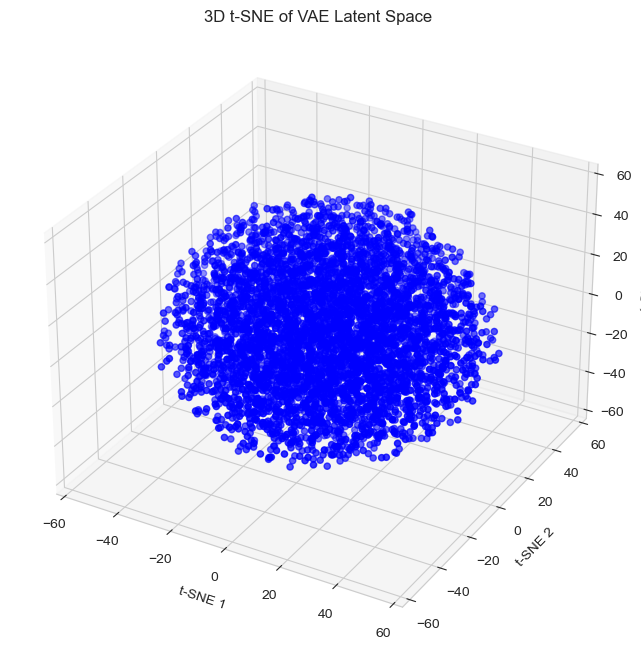

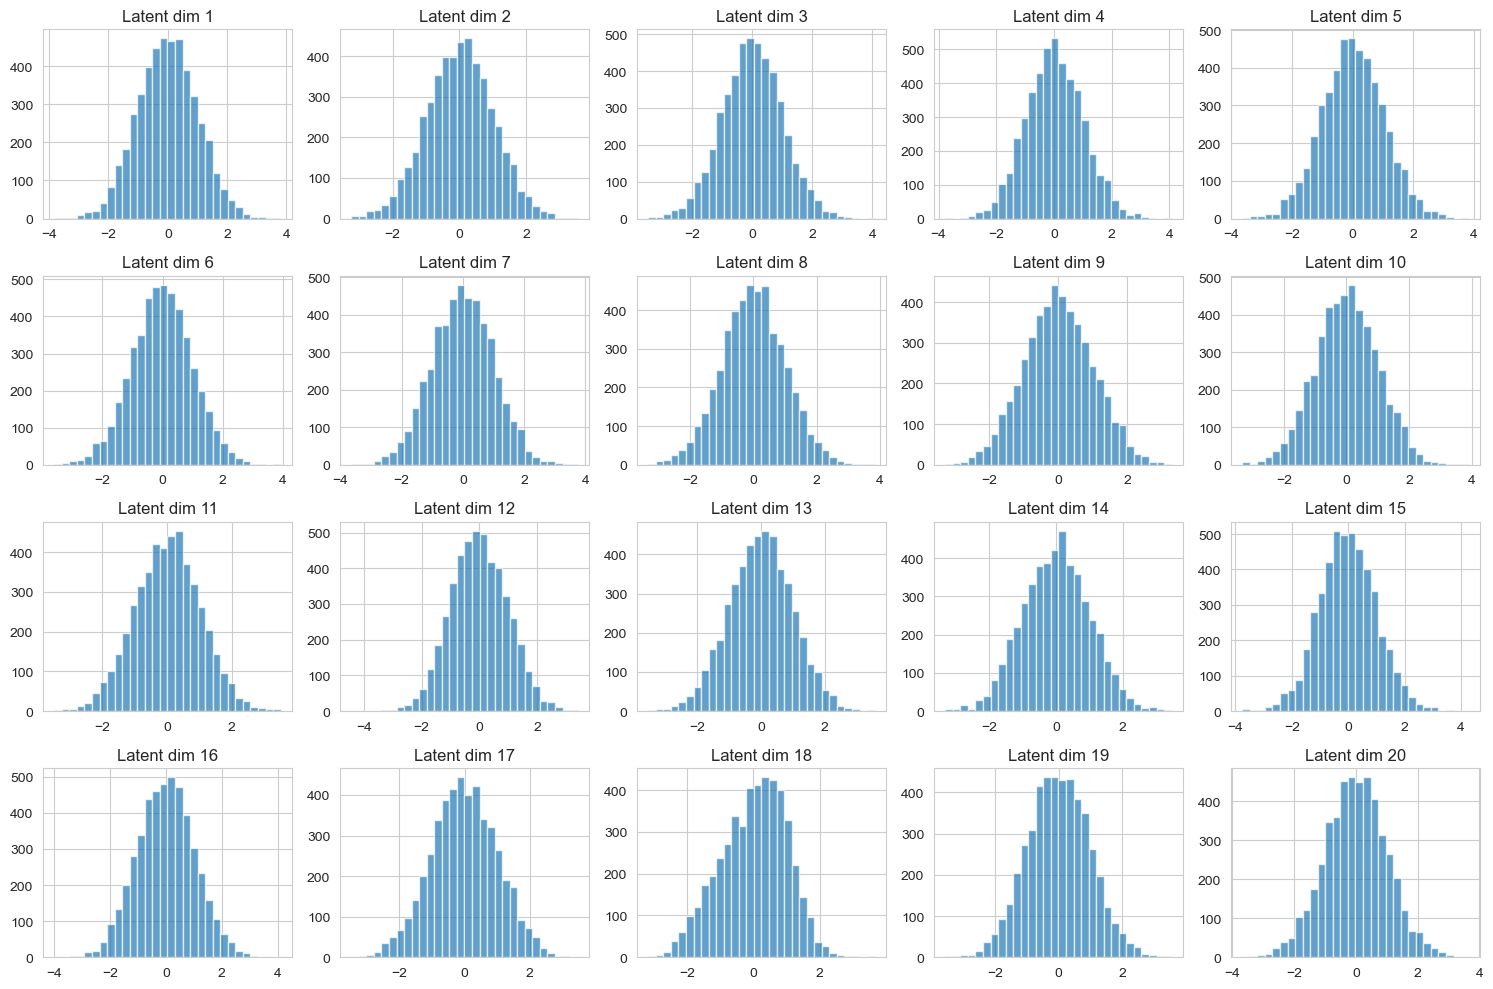

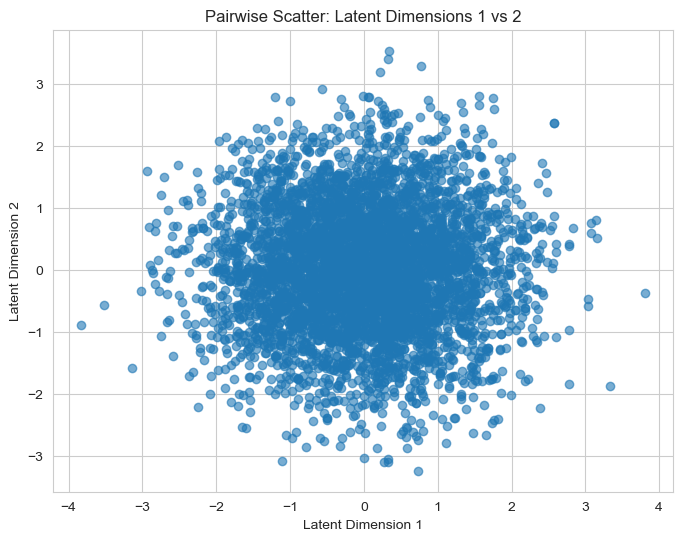

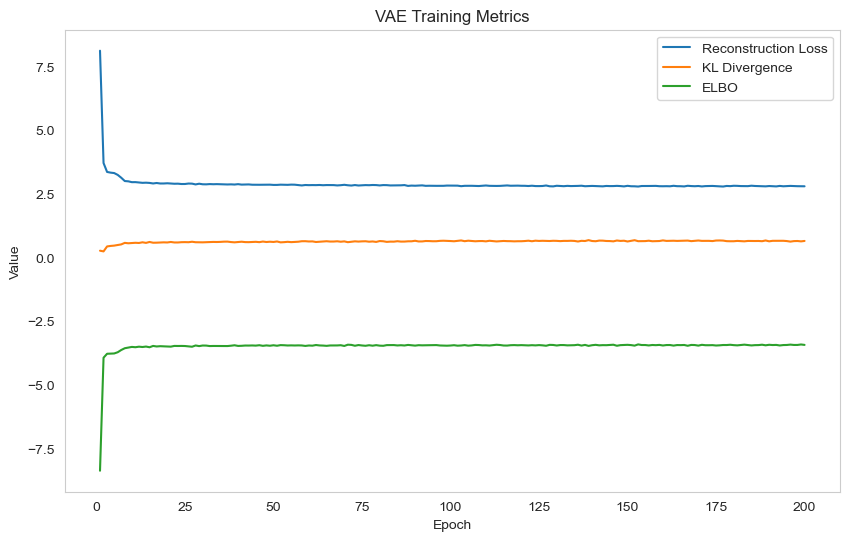

Training metrics plot saved at: results/task5\models\1743751907\vae_training_metrics.png


In [ ]:
# Variational Autoencoder used to generate augmented data by sampling from the learned posterior distribution.
batch_size = 32
epochs = 200
learning_rate = 0.001
hidden_dim = 256
latent_dim = 20

result_dir_task5 = "results/task5"
os.makedirs(result_dir_task5, exist_ok=True)
time_models_dir_task5 = os.path.join(result_dir_task5, "models", str(timestamp))
os.makedirs(time_models_dir_task5, exist_ok=True)
output_dir_task5 = os.path.join(time_models_dir_task5, "outputs")
os.makedirs(output_dir_task5, exist_ok=True)

input_dim = 10 * 10 + country_features + 5     # 10*10=100, plus 5 plus country_features (e.g., 219) equals 324
print(X_train[0])
numerical_data = X_train[:, :, :10]  # shape: (1045, 10, 10)
numerical_flat = numerical_data.reshape(X_train.shape[0], -1)  # shape: (1045, 100)

# Extract country encoding from the first time step (assumed constant for each country)
country_data = X_train[:, 0, 10:]  # shape: (1045, 219)

# Concatenate numerical data, y_train (GDP target), and country_data along axis=1
flattened_data = np.concatenate((numerical_flat, country_data,  y_train), axis=1)  # shape: (1045, 324)
print(f"Flattened data shape: {flattened_data.shape}, Expected input_dim: {input_dim}")

task5_scaler = MinMaxScaler()
flattened_data_scaled = task5_scaler.fit_transform(flattened_data)

# ---------------------- Dataset for VAE ----------------------
class VAEDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# ---------------------- VAE Model ----------------------
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, latent_dim=20):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim // 2, latent_dim)
        # Decoder output activation is Sigmoid to output values in [0,1]
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
    
    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

# ---------------------- Loss Function ----------------------
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    elbo = -(recon_loss + kl_div)
    return recon_loss, kl_div, elbo

# ---------------------- Training Function ----------------------
def train_vae(model, train_loader, epochs=50, lr=0.001):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_recon_losses = []
    train_kl_divs = []
    train_elbos = []
    
    for epoch in range(epochs):
        model.train()
        total_recon_loss = 0
        total_kl_div = 0
        total_elbo = 0
        
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(batch)
            recon_loss, kl_div, elbo = vae_loss(recon_batch, batch, mu, logvar)
            loss = recon_loss + kl_div
            loss.backward()
            optimizer.step()
            total_recon_loss += recon_loss.item()
            total_kl_div += kl_div.item()
            total_elbo += elbo.item()
        
        avg_recon_loss = total_recon_loss / len(train_loader.dataset)
        avg_kl_div = total_kl_div / len(train_loader.dataset)
        avg_elbo = total_elbo / len(train_loader.dataset)
        
        train_recon_losses.append(avg_recon_loss)
        train_kl_divs.append(avg_kl_div)
        train_elbos.append(avg_elbo)
        
        print(f"Epoch {epoch+1}/{epochs} | Recon Loss: {avg_recon_loss:.4f} | KL Div: {avg_kl_div:.4f} | ELBO: {avg_elbo:.4f}")
    
    return train_recon_losses, train_kl_divs, train_elbos

# ---------------------- Visualization ----------------------
def visualize_latent_space(model, data_loader, output_dir):
    model.eval()
    latent_vectors = []
    with torch.no_grad():
        for batch in data_loader:
            batch = batch.to(device)
            mu, logvar = model.encode(batch)
            z = model.reparameterize(mu, logvar)
            latent_vectors.append(z.cpu().numpy())
    latent_vectors = np.concatenate(latent_vectors, axis=0)
    tsne = TSNE(n_components=3, random_state=42)
    latent_3d = tsne.fit_transform(latent_vectors)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(latent_3d[:, 0], latent_3d[:, 1], latent_3d[:, 2], c='b', marker='o')
    ax.set_title("3D t-SNE of VAE Latent Space")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.set_zlabel("t-SNE 3")
    plt.savefig(os.path.join(output_dir, "vae_latent_3d.png"))
    plt.show()

    plt.figure(figsize=(15, 10))
    n_cols = 5
    n_rows = int(np.ceil(latent_dim / n_cols))
    for i in range(latent_dim):
        plt.subplot(n_rows, n_cols, i+1)
        plt.hist(latent_vectors[:, i], bins=30, alpha=0.7)
        plt.title(f"Latent dim {i+1}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "latent_dimensions_histograms.png"))
    plt.show()

    # -------------------------
    # Pairwise Latent Scatter
    # -------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], alpha=0.6)
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.title("Pairwise Scatter: Latent Dimensions 1 vs 2")
    plt.savefig(os.path.join(output_dir, "latent_pairwise_scatter.png"))
    plt.show()

# ---------------------- Main Execution ----------------------
# Use the scaled flattened data for VAE training.
train_dataset = VAEDataset(flattened_data_scaled)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

vae = VAE(input_dim=input_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
recon_losses, kl_divs, elbos = train_vae(vae, train_loader, epochs=epochs, lr=learning_rate)

model_path = os.path.join(time_models_dir_task5, f"vae.pth")
torch.save(vae.state_dict(), model_path)
print(f"VAE model saved at: {model_path}")

visualize_latent_space(vae, train_loader, output_dir)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), recon_losses, label='Reconstruction Loss')
plt.plot(range(1, epochs+1), kl_divs, label='KL Divergence')
plt.plot(range(1, epochs+1), elbos, label='ELBO')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('VAE Training Metrics')
plt.legend()
plt.grid()
metrics_plot_path = os.path.join(time_models_dir_task, f"vae_training_metrics.png")
plt.savefig(metrics_plot_path)
plt.show()
print(f"Training metrics plot saved at: {metrics_plot_path}")



# Task 6: GDP Forecasting with VAE-Augmented Data

In this task, we evaluate whether training deep learning models on a combination of real and synthetic data improves the accuracy of GDP per capita forecasting. The synthetic data is generated using the decoder from the Variational Autoencoder (VAE) trained in Task 5.

#### Synthetic Data Generation

- Latent vectors were sampled from a standard normal distribution and passed through the trained VAE decoder to generate synthetic sequences.
- Each synthetic sample includes:
  - 10 years of economic indicators (100 features)
  - A one-hot encoded country vector (219 features)
  - A 5-year GDP target vector (5 values)
- After inverse-scaling, these were reshaped to match the original input format:
  - Input: shape `(n_samples, 10, 229)`
  - Output: shape `(n_samples, 5)`
- The synthetic dataset was then **combined with the original training set**, effectively doubling the training data for each model.

#### Model Retraining with Augmented Data

Using the same deep learning models from Task 4 — **LSTM**, **CNN-LSTM**, and **Transformer** — we retrained each model on the **augmented dataset**. Key steps included:
- Hyperparameter tuning using a grid search (learning rate, dropout, epochs, batch size)
- Early stopping based on validation loss
- Saving training metrics and model checkpoints for reproducibility

All other preprocessing steps (e.g., scaling, sequence construction) remained consistent to allow direct comparison with models trained on original data only.

#### Evaluation and Comparison

Each model was evaluated on the same held-out test set using the following metrics:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)**

The predictions from models trained on augmented data were compared with those from Task 4 models to determine if the synthetic data improved generalization performance.

#### Visual Analysis

To complement the numerical metrics, we visualized actual vs. predicted GDP per capita over a 5-year forecast horizon for the following representative countries:
- United States
- China
- Russian Federation
- Brazil
- Switzerland
- Denmark

These comparisons helped highlight whether models trained on augmented data were better able to capture diverse economic trends across countries at different stages of development.

#### Output and Artifacts

- Trained models, training history plots, prediction outputs, and visualizations were saved under `results/task6/`.
- Final evaluation metrics were compiled in `results/task6/results.csv`.


(4818, 324)
(4818, 10, 229)
X_train_reconstructed shape: (4818, 10, 229)
y_train_reconstructed shape: (4818, 5)
Original training data: [7.38945677e+00 1.33565110e+07 3.96180000e+01 3.10000000e+01
 1.14523200e+01 6.46555373e+02 7.58800000e+00 3.37000000e+01
 4.41333700e+01 8.67501644e+08 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0000000

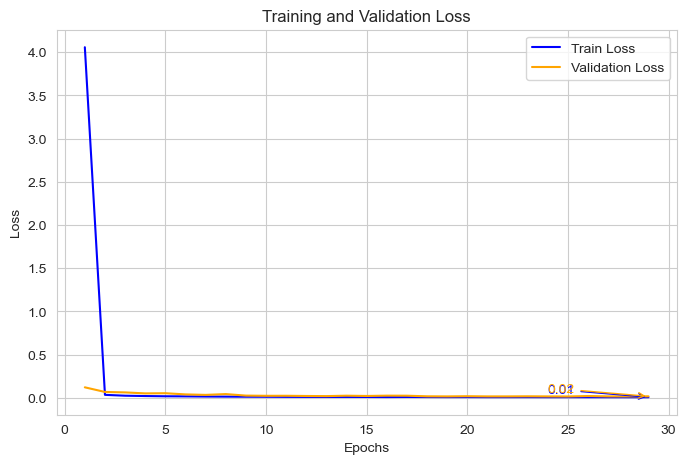

Training history saved to results/task6\models\1743751907\outputs/LSTM_best_model_training_graph
['results/task6\\models\\1743751907\\LSTM.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 34837176.0, 3094.607421875, 13.614507019519806]
Training CNN-LSTM with Dropout=0, LR=0.001, Batch=16, Epochs=50
Epoch 1/50 | Train Loss: 3.7066 | Val Loss: 0.1428
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 2/50 | Train Loss: 0.0811 | Val Loss: 0.0974
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 3/50 | Train Loss: 0.0618 | Val Loss: 0.0859
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_CNN-LSTM_drop0_lr10_bs16_ep50.pth
Epoch 4/50 | Train Loss: 0.0552 | Val Loss: 0.0984
EarlyStopping counter: 1/10 (No improvement)
Epoch 5/50 | Train Loss: 0.0472 | Val Los

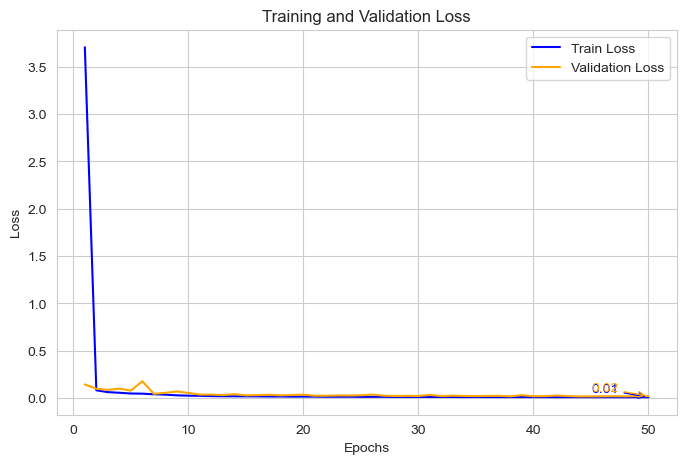

Training history saved to results/task6\models\1743751907\outputs/CNN-LSTM_best_model_training_graph
['results/task6\\models\\1743751907\\CNN-LSTM.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 43273588.0, 3511.27490234375, 15.172486007213593]
Training Transformer with Dropout=0, LR=0.001, Batch=16, Epochs=50
Epoch 1/50 | Train Loss: 4.6136 | Val Loss: 0.1217
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 2/50 | Train Loss: 0.0365 | Val Loss: 0.0770
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 3/50 | Train Loss: 0.0300 | Val Loss: 0.0690
Validation loss improved! Model saved to results/task4\models\1743751907\params_tune\best_model_Transformer_drop0_lr10_bs16_ep50.pth
Epoch 4/50 | Train Loss: 0.0253 | Val Loss: 0.0596
Validation loss improved! Model saved to results/task4\models\17

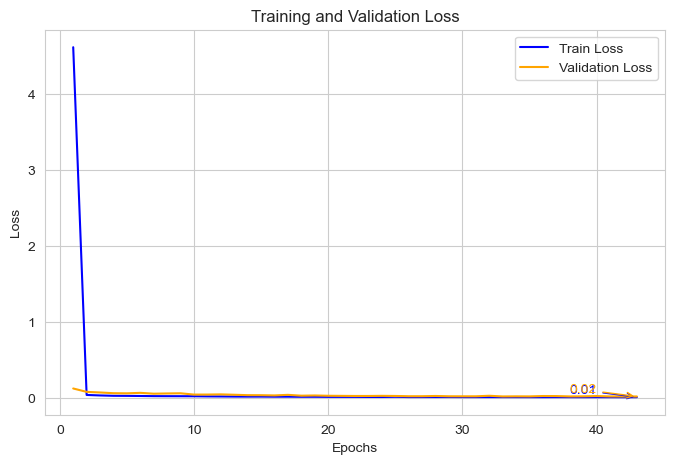

Training history saved to results/task6\models\1743751907\outputs/Transformer_best_model_training_graph
['results/task6\\models\\1743751907\\Transformer.pth', "{'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}", 39523776.0, 3210.116455078125, 14.125674962997437]


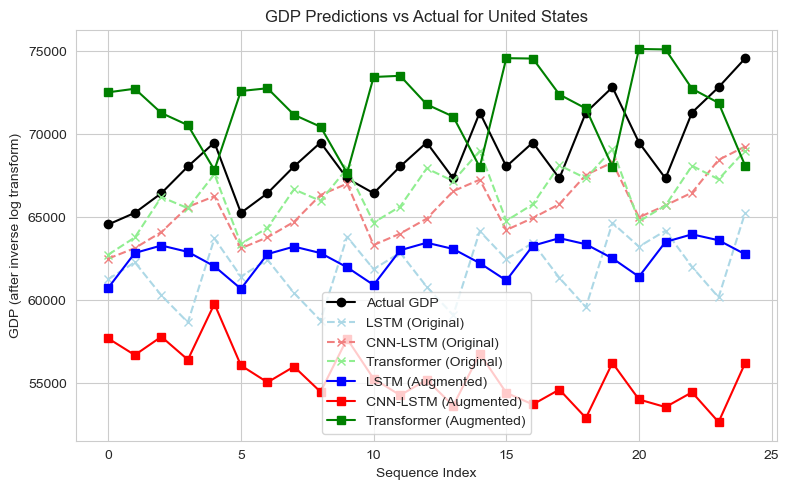

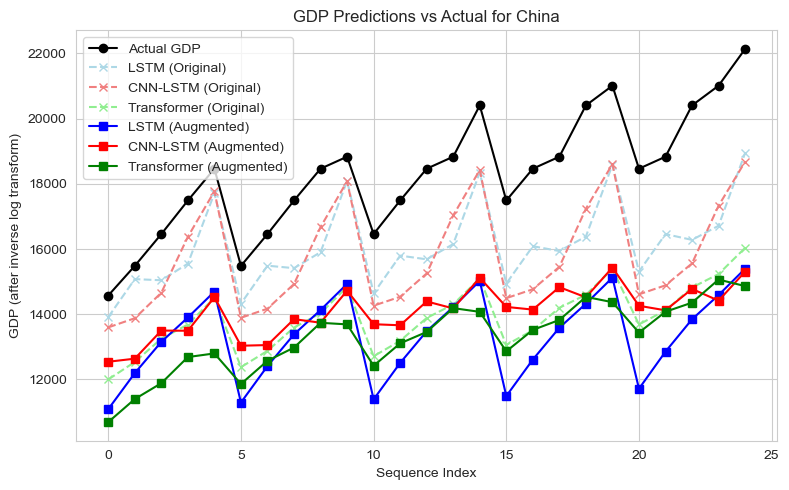

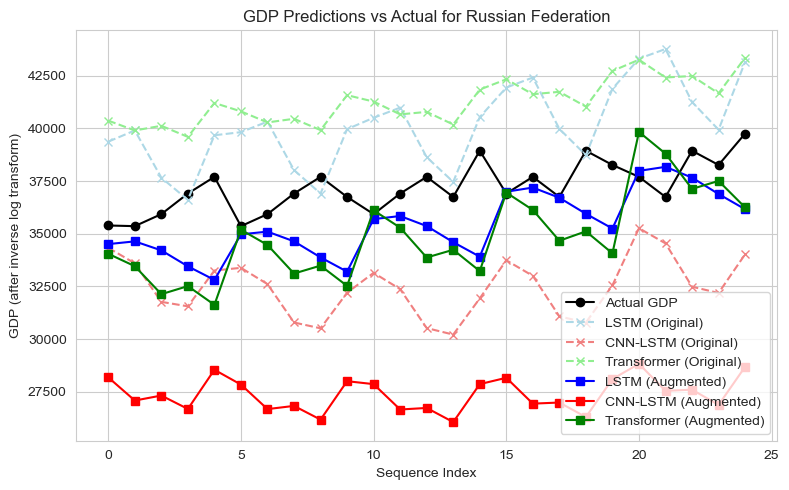

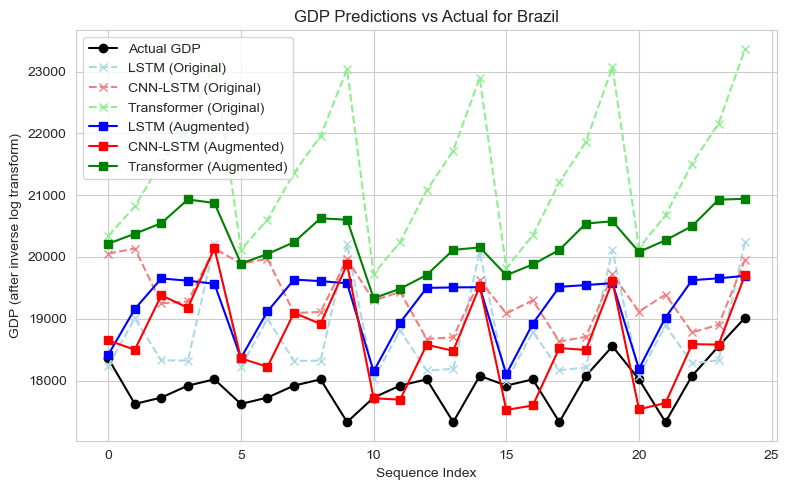

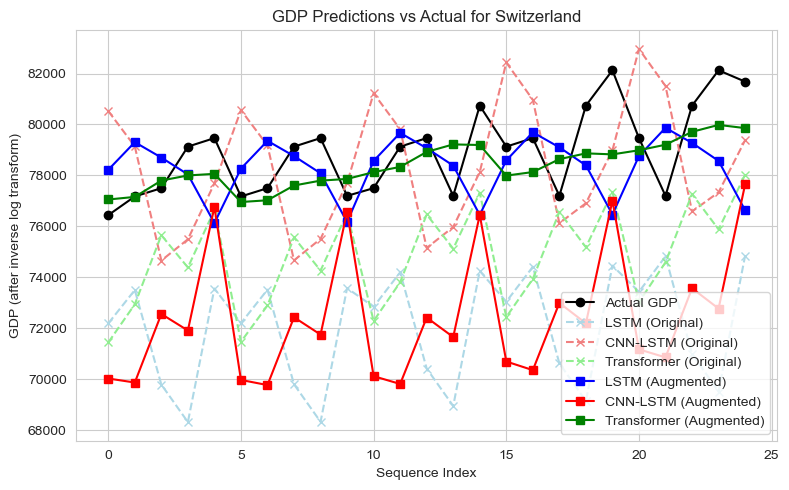

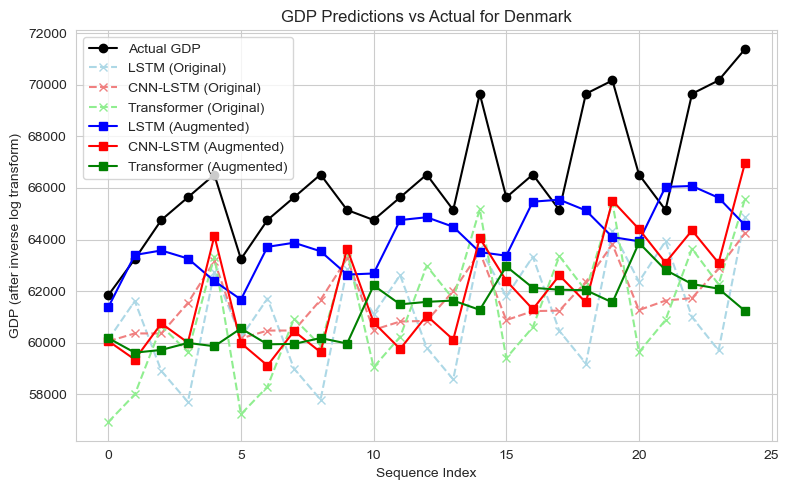

                                         model_path  \
21         results/task6\models\1743751907\LSTM.pth   
22     results/task6\models\1743751907\CNN-LSTM.pth   
23  results/task6\models\1743751907\Transformer.pth   

                                                         params         mse  \
21  {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  34837176.0   
22  {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  43273588.0   
23  {'dropout': 0, 'lr': 0.001, 'batch_size': 16, 'epochs': 50}  39523776.0   

            mae       mape  
21  3094.607422  13.614507  
22  3511.274902  15.172486  
23  3210.116455  14.125675  


In [140]:
# Use VAE Decoder to Generate Synthetic Data, Retrain Models
#predict model compare with Task 4 models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

set_seed(seed)

result_dir = "results/task6"
os.makedirs(result_dir, exist_ok=True)
models_dir = os.path.join(result_dir, "models")
os.makedirs(models_dir, exist_ok=True)
time_models_dir = os.path.join(models_dir, str(timestamp))
os.makedirs(time_models_dir, exist_ok=True)
output_dir=os.path.join(time_models_dir,"outputs")
os.makedirs(output_dir, exist_ok=True)

vae.eval()
n_synthetic = X_train.shape[0]  # Match original size
z_samples = torch.randn(n_synthetic, latent_dim).to(device)
with torch.no_grad():
    synthetic_data = vae.decode(z_samples).cpu().numpy()

synthetic_data_unscaled = task5_scaler.inverse_transform(synthetic_data)
print(synthetic_data_unscaled.shape)
print(X_train.shape)

n_samples = synthetic_data_unscaled.shape[0]
numerical_flat = synthetic_data_unscaled[:, 0:100]  # Shape: (4818, 100)
country_data_reconstructed = synthetic_data_unscaled[:, 100:319]  #  Shape: (4818, 219)
y_train_reconstructed = synthetic_data_unscaled[:, 319:] 

numerical_data_reconstructed = numerical_flat.reshape(n_samples, 10, 10)
country_data_expanded = np.tile(country_data_reconstructed[:, np.newaxis, :], (1, 10, 1))  # (n_samples, 10, 219)
X_train_reconstructed = np.concatenate((numerical_data_reconstructed, country_data_expanded), axis=2)  # (n_samples, 10, 229)

# Verify shapes
print(f"X_train_reconstructed shape: {X_train_reconstructed.shape}")  # Expected: (4818, 10, 229)
print(f"y_train_reconstructed shape: {y_train_reconstructed.shape}")  # Expected: (4818, 5)

X_augmented = np.concatenate([X_train, X_train_reconstructed], axis=0)
y_augmented = np.concatenate([y_train, y_train_reconstructed], axis=0)

X_augmented_scale = scale_sequences(X_augmented)

print("Original training data:", X_train[0][0])
print("Synthetic data:", X_train_reconstructed[0][0])
print("Augmented data:", X_augmented[-1][-1])

print("Original training data:", X_train.shape)
print("Synthetic data:", X_train_reconstructed.shape)
print("Augmented data:", X_augmented.shape)

MODEL_MAPPING = {
    "LSTM": LSTMModel,
    "CNN-LSTM": CNNLSTMModel,
    "Transformer": TransformerModel
}

def plot_gdp_predictions_multi(actuals, lstm_preds, cnn_lstm_preds, transformer_preds,
                               aug_lstm_preds=None, aug_cnn_lstm_preds=None, aug_transformer_preds=None,
                               country_labels=None, selected_countries=None, save_dir="plots"):
    os.makedirs(save_dir, exist_ok=True)
    
    for selected_country in selected_countries:
        country_indices = [i for i, country in enumerate(country_labels) if country == selected_country]
        if not country_indices:
            print(f"No data found for {selected_country}. Skipping...")
            continue

        actual_values = actuals[country_indices].flatten()

        plt.figure(figsize=(8, 5))
        plt.plot(actual_values, label="Actual GDP", marker='o', linestyle='-', color='black')

        # Original predictions (lighter)
        if lstm_preds is not None:
            lstm_values = lstm_preds[country_indices].flatten()
            plt.plot(lstm_values, label="LSTM (Original)", marker='x', linestyle='--', color='lightblue')
        if cnn_lstm_preds is not None:
            cnn_lstm_values = cnn_lstm_preds[country_indices].flatten()
            plt.plot(cnn_lstm_values, label="CNN-LSTM (Original)", marker='x', linestyle='--', color='lightcoral')
        if transformer_preds is not None:
            transformer_values = transformer_preds[country_indices].flatten()
            plt.plot(transformer_values, label="Transformer (Original)", marker='x', linestyle='--', color='lightgreen')

        # Augmented predictions (darker)
        if aug_lstm_preds is not None:
            aug_lstm_values = aug_lstm_preds[country_indices].flatten()
            plt.plot(aug_lstm_values, label="LSTM (Augmented)", marker='s', linestyle='-', color='blue')
        if aug_cnn_lstm_preds is not None:
            aug_cnn_lstm_values = aug_cnn_lstm_preds[country_indices].flatten()
            plt.plot(aug_cnn_lstm_values, label="CNN-LSTM (Augmented)", marker='s', linestyle='-', color='red')
        if aug_transformer_preds is not None:
            aug_transformer_values = aug_transformer_preds[country_indices].flatten()
            plt.plot(aug_transformer_values, label="Transformer (Augmented)", marker='s', linestyle='-', color='green')

        plt.title(f"GDP Predictions vs Actual for {selected_country}")
        plt.xlabel("Sequence Index")
        plt.ylabel("GDP (after inverse log transform)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"{selected_country}_gdp_predictions.png"))
        plt.show()

# Hyperparameter grid search
aug_lstm_preds = None
aug_cnn_lstm_preds = None
aug_transformer_preds = None

for name in models:
    best_model_info = {"model": None, "val_loss": float("inf"), "params": {}, "grid_search_params":{}, "path": None}
    model_class=  MODEL_MAPPING.get(name)
    param_grid = product(dropout_options, learning_rates, batch_sizes, epochs_list)

    for dropout, lr, batch_size, epochs in param_grid:
    # for dropout, lr, batch_size, epochs in param_grid:
        set_seed(seed)
        print(f"Training {name} with Dropout={dropout}, LR={lr}, Batch={batch_size}, Epochs={epochs}")
        train_loader = DataLoader(GDPDataset(X_augmented_scale, y_augmented), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(GDPDataset(X_val_scale, y_val), batch_size=batch_size)

        model = model_class(dropout_rate=dropout)
        
        model_path = f"best_model_{name}_drop{int(dropout*10)}_lr{int(lr*10000)}_bs{batch_size}_ep{epochs}.pth"
        tune_model_path=os.path.join(params_tune_dir, model_path)

        train_losses, val_losses, val_loss, saved_path = train_model(
            model, train_loader, val_loader,
            lr=lr, epochs=epochs, model_path=tune_model_path
        )

        if val_loss < best_model_info["val_loss"]:
            best_model_info = {
                "model": name,
                "val_loss": val_loss,
                "params": {
                    "dropout": dropout,
                    "lr": lr,
                    "batch_size": batch_size,
                    "epochs": epochs
                },
                "grid_search_params": {
                    "dropout_options": dropout_options,
                    "learning_rates": learning_rates,
                    "batch_sizes": batch_sizes,
                    "epochs_list": epochs_list
                },
                "path": saved_path
            }

            history={
                'batch_size': batch_size, 'epochs': epochs, 'lr': lr, 
                'train_losses': train_losses, 'val_losses': val_losses,
            }

    best_model_info_path=f"{time_models_dir}/best_model_info_{name}.json"
    with open(best_model_info_path, "w") as json_file:
        json.dump(best_model_info, json_file, indent=4)

    with open(best_model_info_path, "r") as file:
        config=json.load(file)

    best_params=config["params"]
    model_path=config["path"]

    save_training_history(history, plot_path=f"{output_dir}/{name}_best_model_training_graph")
    final_model_path=os.path.join(time_models_dir, f"{name}.pth")

    model=model_class(dropout_rate=best_params["dropout"])
    model.load_state_dict(torch.load(model_path))

    torch.save(model.state_dict(), final_model_path, _use_new_zipfile_serialization=False)

    test_loader = DataLoader(GDPDataset(X_test_scale, y_test), batch_size=best_params['batch_size'] ,shuffle=False)
    actuals, predictions, country_labels, results = evaluate_model(model, test_loader, test_country_labels)
    predictions_csv_path = os.path.join(output_dir, f"{name}_test_predictions.csv")
    save_predict_results(country_labels, predictions, predictions_csv_path, label="predicted_gdp")


    if name == "LSTM":
        aug_lstm_preds = predictions
    elif name == "CNN-LSTM":
        aug_cnn_lstm_preds = predictions
    elif name == "Transformer":
        aug_transformer_preds = predictions
        
    # Save results to a CSV file
    os.makedirs(result_dir, exist_ok=True)
    result_path = f"{result_dir}/results.csv"
    file_exists = os.path.isfile(result_path)
    header = ["model_path", "params", "mse", "mae", "mape"]
    results=[final_model_path, str(best_params)] + results
    print(results)

    with open(result_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(header)
        writer.writerow(results)

selected_countries = ["United States", "China", "Russian Federation", "Brazil", "Switzerland", "Denmark"] 
plot_gdp_predictions_multi(actuals, lstm_preds, cnn_lstm_preds, transformer_preds, aug_lstm_preds, aug_cnn_lstm_preds, aug_transformer_preds, country_labels, selected_countries, output_dir)
task6_result_df = pd.read_csv(result_path)
print(task6_result_df.tail(3))